In [3]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/c3/eb/496aa2f5d356af4185f770bc76055307f8d1870e11016b10fd779b21769c/xgboost-2.0.3-py3-none-manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 12.8 MB/s eta 0:00:00m eta 0:00:010:00:01


In [4]:
#Importing Libraries

import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd
import datetime #Convert to unix time
import time #Convert to unix time
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams #Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans #Clustering
import math
import pickle
import os
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle

In [15]:
if not os.path.isfile('train_woheader.csv'):
    traincsv = pd.read_csv('train.csv')
    print(traincsv[traincsv.isna().any(1)])
    print(traincsv.info())
    print("Number of duplicate entries: ", sum(traincsv.duplicated()))
    traincsv.to_csv('train_woheader.csv', header=False, index=False)
    print("saved the graph into file")
else:
    g = nx.read_edgelist('train_woheader.csv', delimiter=',', create_using=nx.DiGraph(), nodetype=int)
    print("Number of nodes:", g.number_of_nodes())
    print("Number of edges:", g.number_of_edges())
    print("Graph is directed:", nx.is_directed(g))


Number of nodes: 1862220
Number of edges: 9437519
Graph is directed: True


Number of nodes: 66
Number of edges: 50
Graph is directed: True


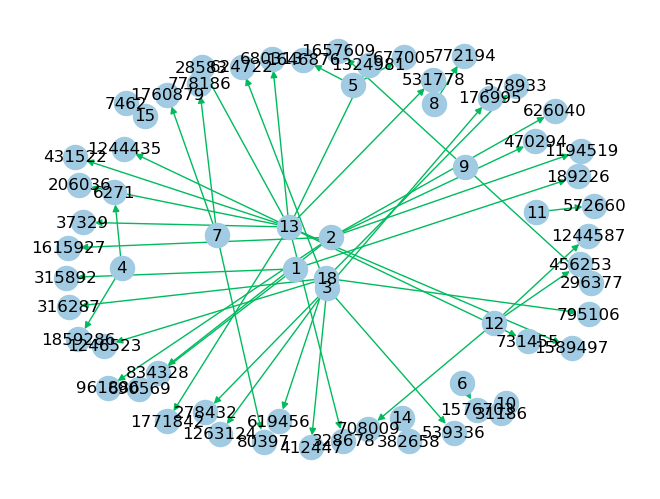

In [18]:
if not os.path.isfile('train_woheader_sample.csv'):
    pd.read_csv('train.csv', nrows=50).to_csv('train_woheader_sample.csv',header=False,index=False)
    
subgraph=nx.read_edgelist('train_woheader_sample.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
# https://stackoverflow.com/questions/9402255/drawing-a-huge-graph-with-networkx-and-matplotlib

pos=nx.spring_layout(subgraph)
nx.draw(subgraph,pos,node_color='#A0CBE2',edge_color='#00bb5e',width=1,edge_cmap=plt.cm.Blues,with_labels=True)
plt.savefig("graph_sample.pdf")
print("Number of nodes:", subgraph.number_of_nodes())
print("Number of edges:", subgraph.number_of_edges())
print("Graph is directed:", nx.is_directed(subgraph))

# Exploratory Data Analysis

In [19]:
# No of Unique persons 
print("The number of unique persons",len(g.nodes()))

The number of unique persons 1862220


## No of followers for each person

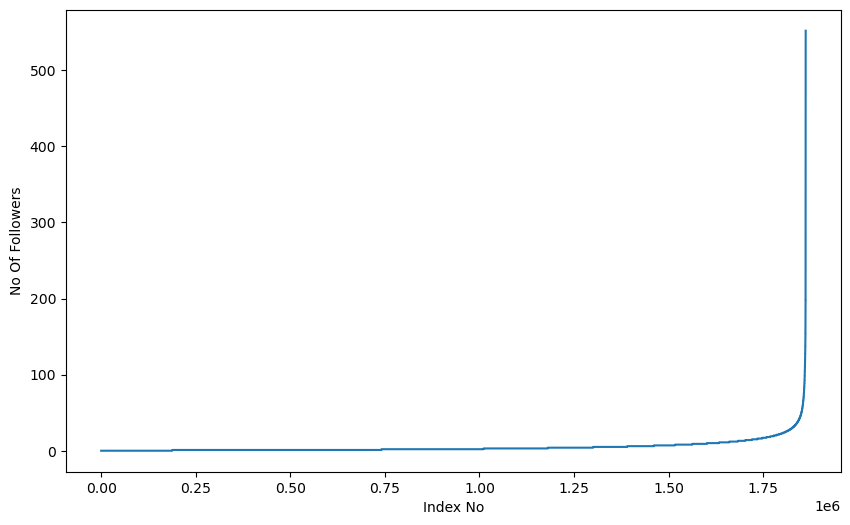

In [20]:
indegree_dist = list(dict(g.in_degree()).values())
indegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(indegree_dist)
plt.xlabel('Index No')
plt.ylabel('No Of Followers')
plt.show()

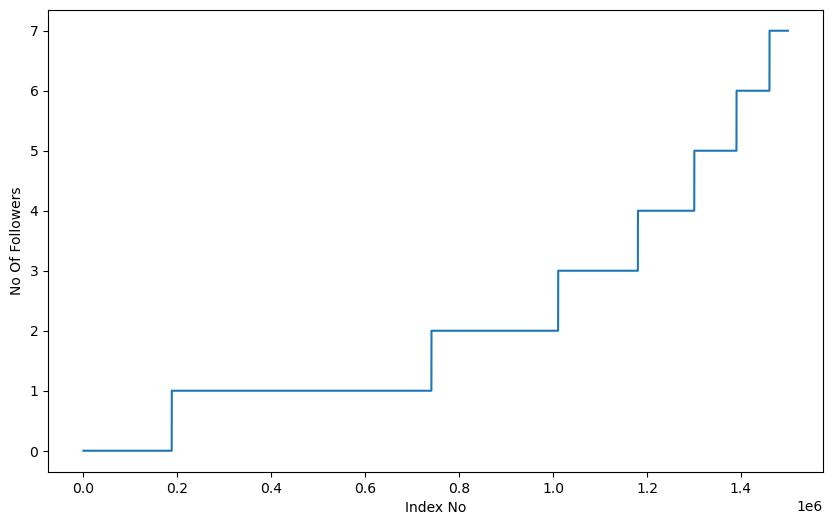

In [21]:
indegree_dist = list(dict(g.in_degree()).values())
indegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(indegree_dist[0:1500000])
plt.xlabel('Index No')
plt.ylabel('No Of Followers')
plt.show()

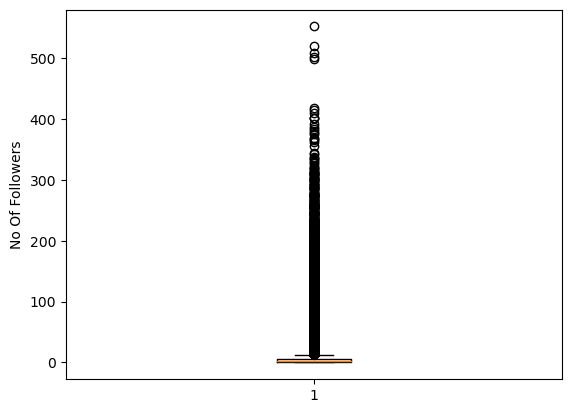

In [22]:
plt.boxplot(indegree_dist)
plt.ylabel('No Of Followers')
plt.show()

In [23]:
### 90-100 percentile
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(indegree_dist,90+i))

90 percentile value is 12.0
91 percentile value is 13.0
92 percentile value is 14.0
93 percentile value is 15.0
94 percentile value is 17.0
95 percentile value is 19.0
96 percentile value is 21.0
97 percentile value is 24.0
98 percentile value is 29.0
99 percentile value is 40.0
100 percentile value is 552.0


In [24]:
### 99-100 percentile
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(indegree_dist,99+(i/100)))

99.1 percentile value is 42.0
99.2 percentile value is 44.0
99.3 percentile value is 47.0
99.4 percentile value is 50.0
99.5 percentile value is 55.0
99.6 percentile value is 61.0
99.7 percentile value is 70.0
99.8 percentile value is 84.0
99.9 percentile value is 112.0
100.0 percentile value is 552.0


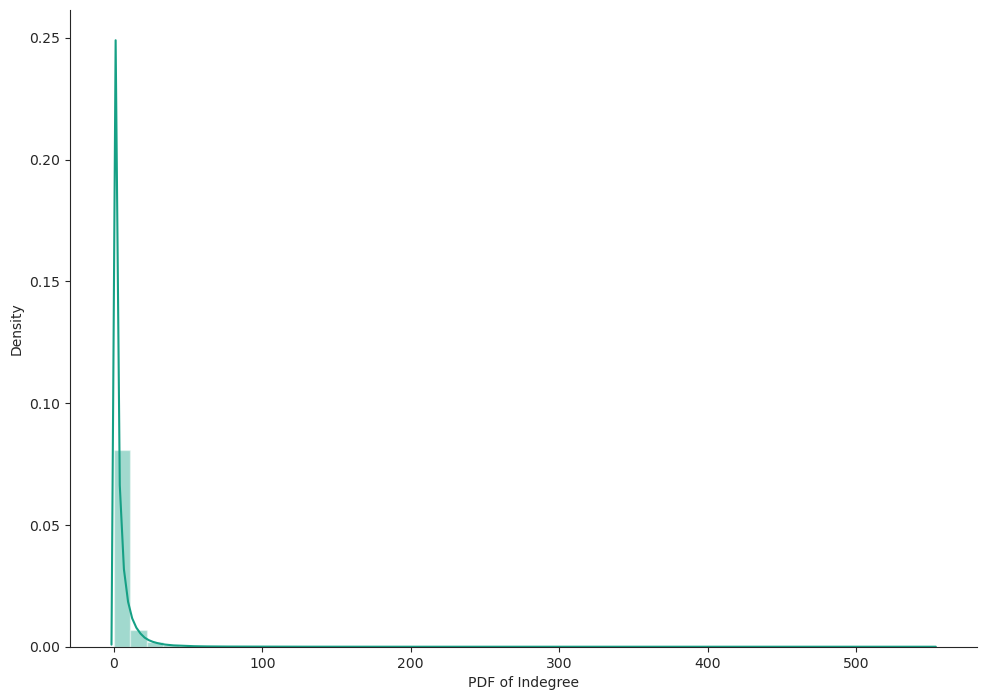

In [25]:
%matplotlib inline
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(indegree_dist, color='#16A085')
plt.xlabel('PDF of Indegree')
sns.despine()
#plt.show()

## No of people each person is following

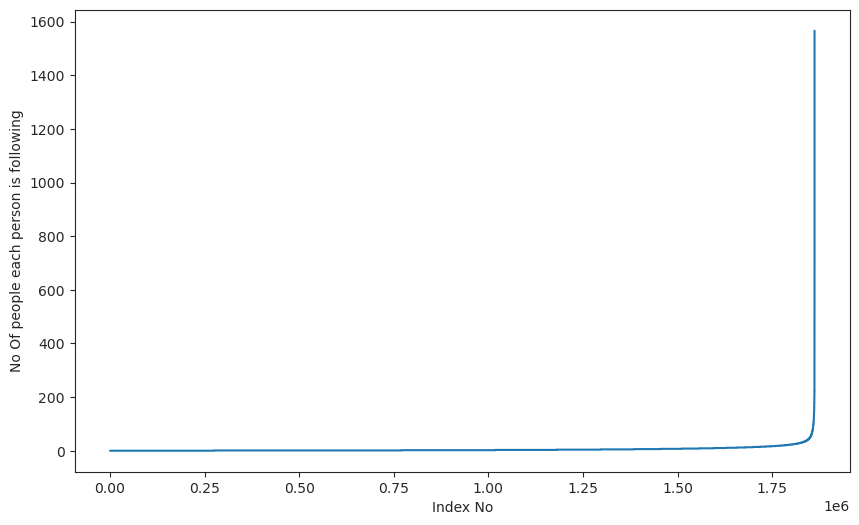

In [26]:
outdegree_dist = list(dict(g.out_degree()).values())
outdegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(outdegree_dist)
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following')
plt.show()

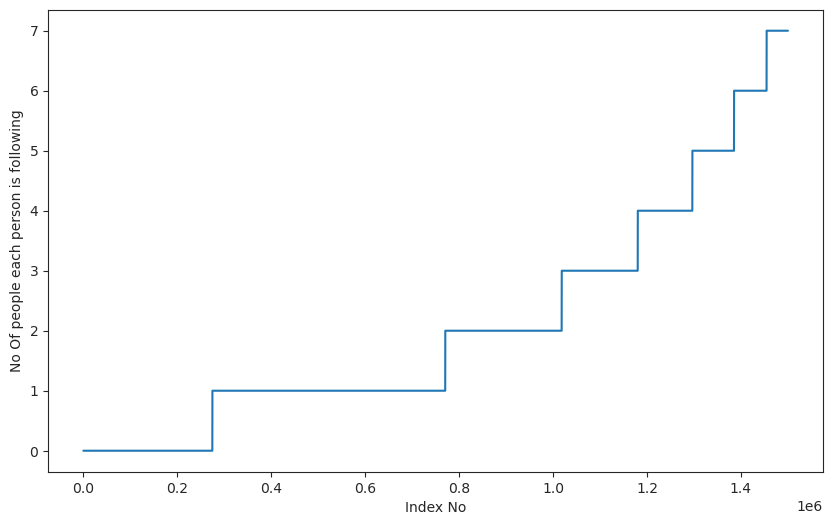

In [27]:
indegree_dist = list(dict(g.in_degree()).values())
indegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(outdegree_dist[0:1500000])
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following')
plt.show()

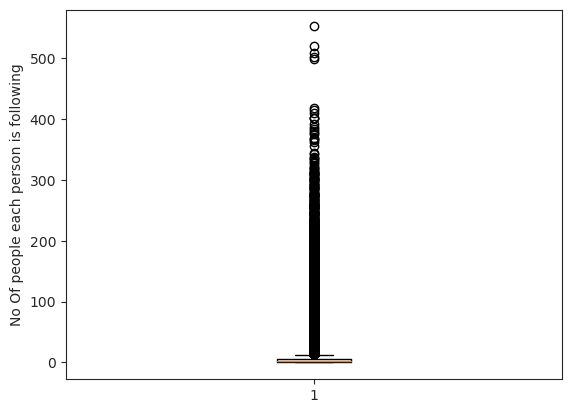

In [28]:
plt.boxplot(indegree_dist)
plt.ylabel('No Of people each person is following')
plt.show()

In [29]:
### 90-100 percentile
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(outdegree_dist,90+i))

90 percentile value is 12.0
91 percentile value is 13.0
92 percentile value is 14.0
93 percentile value is 15.0
94 percentile value is 17.0
95 percentile value is 19.0
96 percentile value is 21.0
97 percentile value is 24.0
98 percentile value is 29.0
99 percentile value is 40.0
100 percentile value is 1566.0


In [30]:
### 99-100 percentile
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(outdegree_dist,99+(i/100)))

99.1 percentile value is 42.0
99.2 percentile value is 45.0
99.3 percentile value is 48.0
99.4 percentile value is 52.0
99.5 percentile value is 56.0
99.6 percentile value is 63.0
99.7 percentile value is 73.0
99.8 percentile value is 90.0
99.9 percentile value is 123.0
100.0 percentile value is 1566.0


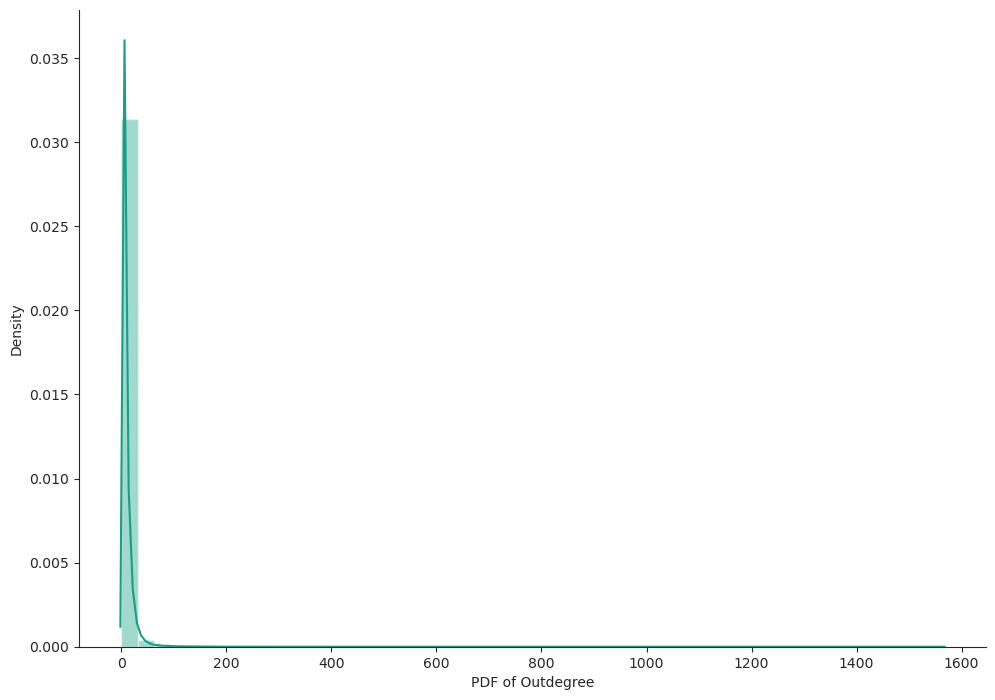

In [31]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(outdegree_dist, color='#16A085')
plt.xlabel('PDF of Outdegree')
sns.despine()

In [32]:
print('No of persons those are not following anyone are' ,sum(np.array(outdegree_dist)==0),'and % is',
                                sum(np.array(outdegree_dist)==0)*100/len(outdegree_dist) )

No of persons those are not following anyone are 274512 and % is 14.741115442858524


In [33]:
print('No of persons having zero followers are' ,sum(np.array(indegree_dist)==0),'and % is',
                                sum(np.array(indegree_dist)==0)*100/len(indegree_dist) )

No of persons having zero followers are 188043 and % is 10.097786512871734


In [34]:
count=0
for i in g.nodes():
    if len(list(g.predecessors(i)))==0 :
        if len(list(g.successors(i)))==0:
            count+=1
print('No of persons those are not not following anyone and also not having any followers are',count)

No of persons those are not not following anyone and also not having any followers are 0


## Both followers + following 

In [35]:
from collections import Counter
dict_in = dict(g.in_degree())
dict_out = dict(g.out_degree())
d = Counter(dict_in) + Counter(dict_out)
in_out_degree = np.array(list(d.values()))

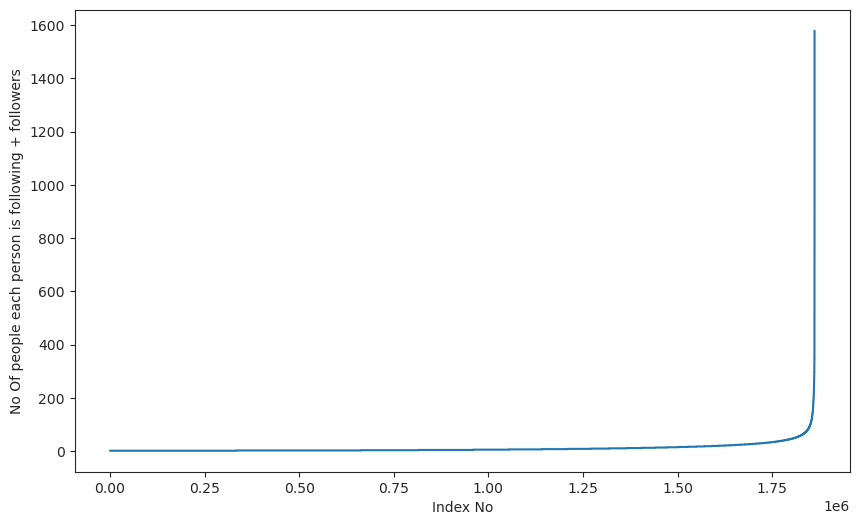

In [36]:
in_out_degree_sort = sorted(in_out_degree)
plt.figure(figsize=(10,6))
plt.plot(in_out_degree_sort)
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following + followers')
plt.show()

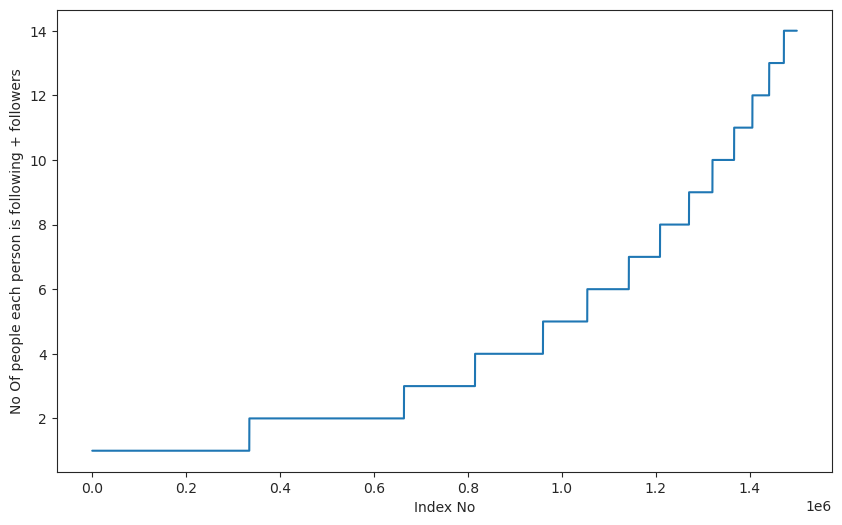

In [37]:
in_out_degree_sort = sorted(in_out_degree)
plt.figure(figsize=(10,6))
plt.plot(in_out_degree_sort[0:1500000])
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following + followers')
plt.show()

In [38]:
### 90-100 percentile
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(in_out_degree_sort,90+i))

90 percentile value is 24.0
91 percentile value is 26.0
92 percentile value is 28.0
93 percentile value is 31.0
94 percentile value is 33.0
95 percentile value is 37.0
96 percentile value is 41.0
97 percentile value is 48.0
98 percentile value is 58.0
99 percentile value is 79.0
100 percentile value is 1579.0


In [39]:
### 99-100 percentile
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(in_out_degree_sort,99+(i/100)))

99.1 percentile value is 83.0
99.2 percentile value is 87.0
99.3 percentile value is 93.0
99.4 percentile value is 99.0
99.5 percentile value is 108.0
99.6 percentile value is 120.0
99.7 percentile value is 138.0
99.8 percentile value is 168.0
99.9 percentile value is 221.0
100.0 percentile value is 1579.0


In [40]:
print('Min of no of followers + following is',in_out_degree.min())
print(np.sum(in_out_degree==in_out_degree.min()),' persons having minimum no of followers + following')

Min of no of followers + following is 1
334291  persons having minimum no of followers + following


In [41]:
print('Max of no of followers + following is',in_out_degree.max())
print(np.sum(in_out_degree==in_out_degree.max()),' persons having maximum no of followers + following')

Max of no of followers + following is 1579
1  persons having maximum no of followers + following


In [42]:
print('No of persons having followers + following less than 10 are',np.sum(in_out_degree<10))

No of persons having followers + following less than 10 are 1320326


In [43]:
print('No of weakly connected components',len(list(nx.weakly_connected_components(g))))
count=0
for i in list(nx.weakly_connected_components(g)):
    if len(i)==2:
        count+=1
print('weakly connected components wit 2 nodes',count)

No of weakly connected components 45558
weakly connected components wit 2 nodes 32195


# Posing the problem as a classification problem 

## Generating some edges which are not present in graph for supervised learning  
Generated Bad links from graph which are not in graph and whose shortest path is greater than 2. 

In [44]:
%%time
###generating bad edges from given graph
import random
if not os.path.isfile('missing_edges_final.p'):
    #Getting set of all edges
    r = csv.reader(open('train_woheader.csv','r'))
    edges = dict()
    for edge in r:
        edges[(edge[0], edge[1])] = 1
        
        
    missing_edges = set([])
    while (len(missing_edges)<9437519):
        a=random.randint(1, 1862220)
        b=random.randint(1, 1862220)
        tmp = edges.get((a,b),-1)
        if tmp == -1 and a!=b:
            try:
                if nx.shortest_path_length(g,source=a,target=b) > 2: 

                    missing_edges.add((a,b))
                else:
                    continue  
            except:  
                    missing_edges.add((a,b))              
        else:
            continue
    pickle.dump(missing_edges,open('missing_edges_final.p','wb'))
else:
    missing_edges = pickle.load(open('missing_edges_final.p','rb'))

CPU times: user 1h 29min 56s, sys: 1.6 s, total: 1h 29min 57s
Wall time: 1h 29min 57s


In [46]:
missing_edges = pickle.load(open('missing_edges_final.p','rb'))
len(missing_edges)

9437519

## Training and Test data split:  
Removed edges from Graph and used as test data and after removing used that graph for creating features for Train and test data

In [47]:
from sklearn.model_selection import train_test_split
if (not os.path.isfile('train_pos_after_eda.csv')) and (not os.path.isfile('test_pos_after_eda.csv')):
    #reading total data df
    df_pos = pd.read_csv('train.csv')
    df_neg = pd.DataFrame(list(missing_edges), columns=['source_node', 'destination_node'])
    
    print("Number of nodes in the graph with edges", df_pos.shape[0])
    print("Number of nodes in the graph without edges", df_neg.shape[0])
    
    #Trian test split 
    #Spiltted data into 80-20 
    #positive links and negative links seperatly because we need positive training data only for creating graph 
    #and for feature generation
    X_train_pos, X_test_pos, y_train_pos, y_test_pos  = train_test_split(df_pos,np.ones(len(df_pos)),test_size=0.2, random_state=9)
    X_train_neg, X_test_neg, y_train_neg, y_test_neg  = train_test_split(df_neg,np.zeros(len(df_neg)),test_size=0.2, random_state=9)
    
    print('='*60)
    print("Number of nodes in the train data graph with edges", X_train_pos.shape[0],"=",y_train_pos.shape[0])
    print("Number of nodes in the train data graph without edges", X_train_neg.shape[0],"=", y_train_neg.shape[0])
    print('='*60)
    print("Number of nodes in the test data graph with edges", X_test_pos.shape[0],"=",y_test_pos.shape[0])
    print("Number of nodes in the test data graph without edges", X_test_neg.shape[0],"=",y_test_neg.shape[0])

    #removing header and saving
    X_train_pos.to_csv('train_pos_after_eda.csv',header=False, index=False)
    X_test_pos.to_csv('test_pos_after_eda.csv',header=False, index=False)
    X_train_neg.to_csv('train_neg_after_eda.csv',header=False, index=False)
    X_test_neg.to_csv('test_neg_after_eda.csv',header=False, index=False)
else:
    #Graph from Traing data only 
    print('deleting ........')
    del missing_edges

Number of nodes in the graph with edges 9437519
Number of nodes in the graph without edges 9437519
Number of nodes in the train data graph with edges 7550015 = 7550015
Number of nodes in the train data graph without edges 7550015 = 7550015
Number of nodes in the test data graph with edges 1887504 = 1887504
Number of nodes in the test data graph without edges 1887504 = 1887504


In [50]:
# if (os.path.isfile('train_pos_after_eda.csv')) and (os.path.isfile('test_pos_after_eda.csv')):        
#     train_graph=nx.read_edgelist('train_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
#     test_graph=nx.read_edgelist('test_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
#     print(nx.info(train_graph))
#     print(nx.info(test_graph))

#     # finding the unique nodes in the both train and test graphs
#     train_nodes_pos = set(train_graph.nodes())
#     test_nodes_pos = set(test_graph.nodes())

#     trY_teY = len(train_nodes_pos.intersection(test_nodes_pos))
#     trY_teN = len(train_nodes_pos - test_nodes_pos)
#     teY_trN = len(test_nodes_pos - train_nodes_pos)

#     print('no of people common in train and test -- ',trY_teY)
#     print('no of people present in train but not present in test -- ',trY_teN)

#     print('no of people present in test but not present in train -- ',teY_trN)
#     print(' % of people not there in Train but exist in Test in total Test data are {} %'.format(teY_trN/len(test_nodes_pos)*100))

import networkx as nx
import os

if (os.path.isfile('train_pos_after_eda.csv')) and (os.path.isfile('test_pos_after_eda.csv')):        
    train_graph = nx.read_edgelist('train_pos_after_eda.csv', delimiter=',', create_using=nx.DiGraph(), nodetype=int)
    test_graph = nx.read_edgelist('test_pos_after_eda.csv', delimiter=',', create_using=nx.DiGraph(), nodetype=int)

    print("Train Graph:")
    print("Number of nodes:", train_graph.number_of_nodes())
    print("Number of edges:", train_graph.number_of_edges())
    print("Average in degree:", sum(dict(train_graph.in_degree()).values()) / train_graph.number_of_nodes())
    print("Average out degree:", sum(dict(train_graph.out_degree()).values()) / train_graph.number_of_nodes())

    print("\nTest Graph:")
    print("Number of nodes:", test_graph.number_of_nodes())
    print("Number of edges:", test_graph.number_of_edges())
    print("Average in degree:", sum(dict(test_graph.in_degree()).values()) / test_graph.number_of_nodes())
    print("Average out degree:", sum(dict(test_graph.out_degree()).values()) / test_graph.number_of_nodes())

    # finding the unique nodes in both train and test graphs
    train_nodes_pos = set(train_graph.nodes())
    test_nodes_pos = set(test_graph.nodes())

    trY_teY = len(train_nodes_pos.intersection(test_nodes_pos))
    trY_teN = len(train_nodes_pos - test_nodes_pos)
    teY_trN = len(test_nodes_pos - train_nodes_pos)

    print('\nNo of people common in train and test --', trY_teY)
    print('No of people present in train but not present in test --', trY_teN)
    print('No of people present in test but not present in train --', teY_trN)
    print('% of people not there in Train but exist in Test in total Test data are {:.2f}%'.format(teY_trN / len(test_nodes_pos) * 100))


Train Graph:
Number of nodes: 1780722
Number of edges: 7550015
Average in degree: 4.239861696547805
Average out degree: 4.239861696547805

Test Graph:
Number of nodes: 1144623
Number of edges: 1887504
Average in degree: 1.649018060968546
Average out degree: 1.649018060968546

No of people common in train and test -- 1063125
No of people present in train but not present in test -- 717597
No of people present in test but not present in train -- 81498
% of people not there in Train but exist in Test in total Test data are 7.12%


In [55]:
# #final train and test data sets
# if (not os.path.isfile('train_after_eda.csv')) and \
# (not os.path.isfile('test_after_eda.csv')) and \
# (not os.path.isfile('train_y.csv')) and \
# (not os.path.isfile('test_y.csv')) and \
# (os.path.isfile('train_pos_after_eda.csv')) and \
# (os.path.isfile('test_pos_after_eda.csv')) and \
# (os.path.isfile('train_neg_after_eda.csv')) and \
# (os.path.isfile('test_neg_after_eda.csv')):
    
#     X_train_pos = pd.read_csv('train_pos_after_eda.csv', names=['source_node', 'destination_node'])
#     X_test_pos = pd.read_csv('test_pos_after_eda.csv', names=['source_node', 'destination_node'])
#     X_train_neg = pd.read_csv('train_neg_after_eda.csv', names=['source_node', 'destination_node'])
#     X_test_neg = pd.read_csv('test_neg_after_eda.csv', names=['source_node', 'destination_node'])

#     print('='*60)
#     print("Number of nodes in the train data graph with edges", X_train_pos.shape[0])
#     print("Number of nodes in the train data graph without edges", X_train_neg.shape[0])
#     print('='*60)
#     print("Number of nodes in the test data graph with edges", X_test_pos.shape[0])
#     print("Number of nodes in the test data graph without edges", X_test_neg.shape[0])

#     X_train = X_train_pos.append(X_train_neg,ignore_index=True)
#     y_train = np.concatenate((y_train_pos,y_train_neg))
#     X_test = X_test_pos.append(X_test_neg,ignore_index=True)
#     y_test = np.concatenate((y_test_pos,y_test_neg)) 
    
#     X_train.to_csv('train_after_eda.csv',header=False,index=False)
#     X_test.to_csv('test_after_eda.csv',header=False,index=False)
#     pd.DataFrame(y_train.astype(int)).to_csv('train_y.csv',header=False,index=False)
#     pd.DataFrame(y_test.astype(int)).to_csv('test_y.csv',header=False,index=False)

if (not os.path.isfile('train_after_eda.csv')) and \
   (not os.path.isfile('test_after_eda.csv')) and \
   (not os.path.isfile('train_y.csv')) and \
   (not os.path.isfile('test_y.csv')) and \
   (os.path.isfile('train_pos_after_eda.csv')) and \
   (os.path.isfile('test_pos_after_eda.csv')) and \
   (os.path.isfile('train_neg_after_eda.csv')) and \
   (os.path.isfile('test_neg_after_eda.csv')):
    
    X_train_pos = pd.read_csv('train_pos_after_eda.csv', names=['source_node', 'destination_node'])
    X_test_pos = pd.read_csv('test_pos_after_eda.csv', names=['source_node', 'destination_node'])
    X_train_neg = pd.read_csv('train_neg_after_eda.csv', names=['source_node', 'destination_node'])
    X_test_neg = pd.read_csv('test_neg_after_eda.csv', names=['source_node', 'destination_node'])

    print('='*60)
    print("Number of nodes in the train data graph with edges", X_train_pos.shape[0])
    print("Number of nodes in the train data graph without edges", X_train_neg.shape[0])
    print('='*60)
    print("Number of nodes in the test data graph with edges", X_test_pos.shape[0])
    print("Number of nodes in the test data graph without edges", X_test_neg.shape[0])

    X_train = pd.concat([X_train_pos, X_train_neg], ignore_index=True)
    y_train = np.concatenate((y_train_pos, y_train_neg))
    X_test = pd.concat([X_test_pos, X_test_neg], ignore_index=True)
    y_test = np.concatenate((y_test_pos, y_test_neg)) 
    
    X_train.to_csv('train_after_eda.csv', header=False, index=False)
    X_test.to_csv('test_after_eda.csv', header=False, index=False)
    pd.DataFrame(y_train.astype(int)).to_csv('train_y.csv', header=False, index=False)
    pd.DataFrame(y_test.astype(int)).to_csv('test_y.csv', header=False, index=False)


Number of nodes in the train data graph with edges 7550015
Number of nodes in the train data graph without edges 7550015
Number of nodes in the test data graph with edges 1887504
Number of nodes in the test data graph without edges 1887504


In [56]:
print("Data points in train data",X_train.shape)
print("Data points in test data",X_test.shape)
print("Shape of traget variable in train",y_train.shape)
print("Shape of traget variable in test", y_test.shape)

Data points in train data (15100030, 2)
Data points in test data (3775008, 2)
Shape of traget variable in train (15100030,)
Shape of traget variable in test (3775008,)


# **Inspecting Graph Edge Featurizations**

In [57]:
#Importing Libraries
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd
import datetime #Convert to unix time
import time #Convert to unix time
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib import rcParams #Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans 
import math
import pickle
import os

import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm

# Reading Data

In [61]:
# train_graph=nx.read_edgelist('train_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
# print(nx.info(train_graph))
import networkx as nx

train_graph = nx.read_edgelist('train_pos_after_eda.csv', delimiter=',', create_using=nx.DiGraph(), nodetype=int)

print("Name: ")
print("Type: DiGraph")
print("Number of nodes:", train_graph.number_of_nodes())
print("Number of edges:", train_graph.number_of_edges())
print("Average in degree:", sum(dict(train_graph.in_degree()).values()) / train_graph.number_of_nodes())
print("Average out degree:", sum(dict(train_graph.out_degree()).values()) / train_graph.number_of_nodes())


Name: 
Type: DiGraph
Number of nodes: 1780722
Number of edges: 7550015
Average in degree: 4.239861696547805
Average out degree: 4.239861696547805


 # Similarity measures

## [Jaccard Distance](http://www.statisticshowto.com/jaccard-index/)

\begin{equation}
j = \frac{|X\cap Y|}{|X \cup Y|} 
\end{equation}

In [62]:
#for followees
def jaccard_for_followees(a,b):
    try:
        if len(set(train_graph.successors(a))) == 0  | len(set(train_graph.successors(b))) == 0:
            return 0
        sim = (len(set(train_graph.successors(a)).intersection(set(train_graph.successors(b)))))/\
                                    (len(set(train_graph.successors(a)).union(set(train_graph.successors(b)))))
    except:
        return 0
    return sim

In [63]:
#one test case
print(jaccard_for_followees(273084,1505602))

0.0


In [64]:
#node 1635354 not in graph 
print(jaccard_for_followees(273084,1505602))

0.0


In [65]:
#for followers
def jaccard_for_followers(a,b):
    try:
        if len(set(train_graph.predecessors(a))) == 0  | len(set(g.predecessors(b))) == 0:
            return 0
        sim = (len(set(train_graph.predecessors(a)).intersection(set(train_graph.predecessors(b)))))/\
                                 (len(set(train_graph.predecessors(a)).union(set(train_graph.predecessors(b)))))
        return sim
    except:
        return 0

In [66]:
print(jaccard_for_followers(273084,470294))

0.0


In [67]:
#node 1635354 not in graph 
print(jaccard_for_followees(669354,1635354))

0


## Cosine distance

\begin{equation}
CosineDistance = \frac{|X\cap Y|}{|X|\cdot|Y|} 
\end{equation}

In [68]:
#for followees
def cosine_for_followees(a,b):
    try:
        if len(set(train_graph.successors(a))) == 0  | len(set(train_graph.successors(b))) == 0:
            return 0
        sim = (len(set(train_graph.successors(a)).intersection(set(train_graph.successors(b)))))/\
                                    (math.sqrt(len(set(train_graph.successors(a)))*len((set(train_graph.successors(b))))))
        return sim
    except:
        return 0

In [69]:
print(cosine_for_followees(273084,1505602))

0.0


In [70]:
print(cosine_for_followees(273084,1635354))

0


In [71]:
def cosine_for_followers(a,b):
    try:
        
        if len(set(train_graph.predecessors(a))) == 0  | len(set(train_graph.predecessors(b))) == 0:
            return 0
        sim = (len(set(train_graph.predecessors(a)).intersection(set(train_graph.predecessors(b)))))/\
                                     (math.sqrt(len(set(train_graph.predecessors(a))))*(len(set(train_graph.predecessors(b)))))
        return sim
    except:
        return 0

In [72]:
print(cosine_for_followers(2,470294))

0.02886751345948129


In [73]:
print(cosine_for_followers(669354,1635354))

0


## Ranking Measures

[PageRank Link Analysis Reference](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html)

PageRank computes a ranking of the nodes in the graph G based on the structure of the incoming links.

Mathematical PageRanks for a simple network, expressed as percentages. (Google uses a logarithmic scale.) Page C has a higher PageRank than Page E, even though there are fewer links to C; the one link to C comes from an important page and hence is of high value. If web surfers who start on a random page have an 85% likelihood of choosing a random link from the page they are currently visiting, and a 15% likelihood of jumping to a page chosen at random from the entire web, they will reach Page E 8.1% of the time. <b>(The 15% likelihood of jumping to an arbitrary page corresponds to a damping factor of 85%.) Without damping, all web surfers would eventually end up on Pages A, B, or C, and all other pages would have PageRank zero. In the presence of damping, Page A effectively links to all pages in the web, even though it has no outgoing links of its own.</b>

## Page Ranking

[PageRank Wiki article](https://en.wikipedia.org/wiki/PageRank)


In [74]:
if not os.path.isfile('page_rank.p'):
    pr = nx.pagerank(train_graph, alpha=0.85)
    pickle.dump(pr,open('page_rank.p','wb'))
else:
    pr = pickle.load(open('page_rank.p','rb'))

In [75]:
print('min',pr[min(pr, key=pr.get)])
print('max',pr[max(pr, key=pr.get)])
print('mean',float(sum(pr.values())) / len(pr))

min 1.6556497245737814e-07
max 2.709825134193587e-05
mean 5.615699699389075e-07


In [76]:
#for imputing to nodes which are not there in Train data
mean_pr = float(sum(pr.values())) / len(pr)
print(mean_pr)

5.615699699389075e-07


# Other Graph Features

## Shortest path:

Getting Shortest path between two nodes, if nodes have direct path i.e directly connected then we are removing that edge and calculating path. 

In [77]:
#if has direct edge then deleting that edge and calculating shortest path
def compute_shortest_path_length(a,b):
    p=-1
    try:
        if train_graph.has_edge(a,b):
            train_graph.remove_edge(a,b)
            p= nx.shortest_path_length(train_graph,source=a,target=b)
            train_graph.add_edge(a,b)
        else:
            p= nx.shortest_path_length(train_graph,source=a,target=b)
        return p
    except:
        return -1

In [78]:
#testing
compute_shortest_path_length(77697, 826021)

10

In [79]:
#testing
compute_shortest_path_length(669354,1635354)

-1

## Checking for same community

In [80]:
#getting weakly connected edges from graph 
wcc=list(nx.weakly_connected_components(train_graph))
def belongs_to_same_wcc(a,b):
    index = []
    if train_graph.has_edge(b,a):
        return 1
    if train_graph.has_edge(a,b):
            for i in wcc:
                if a in i:
                    index= i
                    break
            if (b in index):
                train_graph.remove_edge(a,b)
                if compute_shortest_path_length(a,b)==-1:
                    train_graph.add_edge(a,b)
                    return 0
                else:
                    train_graph.add_edge(a,b)
                    return 1
            else:
                return 0
    else:
            for i in wcc:
                if a in i:
                    index= i
                    break
            if(b in index):
                return 1
            else:
                return 0

In [81]:
belongs_to_same_wcc(861, 1659750)

0

In [82]:
belongs_to_same_wcc(669354,1635354)

0

## Adamic/Adar Index:
Adamic/Adar measures is defined as inverted sum of degrees of common neighbours for given two vertices.
$$A(x,y)=\sum_{u \in N(x) \cap N(y)}\frac{1}{log(|N(u)|)}$$

In [83]:
#adar index
def calc_adar_in(a,b):
    sum=0
    try:
        n=list(set(train_graph.successors(a)).intersection(set(train_graph.successors(b))))
        if len(n)!=0:
            for i in n:
                sum=sum+(1/np.log10(len(list(train_graph.predecessors(i)))))
            return sum
        else:
            return 0
    except:
        return 0

In [84]:
calc_adar_in(1,189226)

0

In [85]:
calc_adar_in(669354,1635354)

0

## Is the person following back ? :

In [86]:
def follows_back(a,b):
    if train_graph.has_edge(b,a):
        return 1
    else:
        return 0

In [87]:
follows_back(1,189226)

1

In [88]:
follows_back(669354,1635354)

0

## Katz Centrality:
[Wiki article](https://en.wikipedia.org/wiki/Katz_centrality)

[GFG article](https://www.geeksforgeeks.org/katz-centrality-centrality-measure/)

 Katz centrality computes the centrality for a node 
    based on the centrality of its neighbors. It is a 
    generalization of the eigenvector centrality. The
    Katz centrality for node `i` is
 
$$x_i = \alpha \sum_{j} A_{ij} x_j + \beta,$$
where `A` is the adjacency matrix of the graph G 
with eigenvalues $$\lambda$$.

The parameter $$\beta$$ controls the initial centrality and 

$$\alpha < \frac{1}{\lambda_{max}}.$$

In [89]:
if not os.path.isfile('katz.p'):
    katz = nx.katz.katz_centrality(train_graph,alpha=0.005,beta=1)
    pickle.dump(katz,open('katz.p','wb'))
else:
    katz = pickle.load(open('katz.p','rb'))

In [90]:
print('min',katz[min(katz, key=katz.get)])
print('max',katz[max(katz, key=katz.get)])
print('mean',float(sum(katz.values())) / len(katz))

min 0.0007313532484055978
max 0.003394554981694509
mean 0.0007483800935553944


In [91]:
mean_katz = float(sum(katz.values())) / len(katz)
print(mean_katz)

0.0007483800935553944


## Hits Score
The HITS algorithm computes two numbers for a node. Authorities estimates the node value based on the incoming links. Hubs estimates the node value based on outgoing links.

[Wiki article](https://en.wikipedia.org/wiki/HITS_algorithm)

In [92]:
if not os.path.isfile('hits.p'):
    hits = nx.hits(train_graph, max_iter=100, tol=1e-08, nstart=None, normalized=True)
    pickle.dump(hits,open('hits.p','wb'))
else:
    hits = pickle.load(open('hits.p','rb'))

In [93]:
 print('min',hits[0][min(hits[0], key=hits[0].get)])
print('max',hits[0][max(hits[0], key=hits[0].get)])
print('mean',float(sum(hits[0].values())) / len(hits[0]))

min -1.960104083557133e-20
max 0.004868653379538987
mean 5.61569969930868e-07


# Featurization

In [94]:
import random
if os.path.isfile('train_after_eda.csv'):
    filename = "train_after_eda.csv"
    # We'll uncomment this line, if we dont know the length of the file name
    # here we have hardcoded the number of lines as 15100028
    # n_train = sum(1 for line in open(filename)) #number of records in file (excludes header)
    n_train =  15100028
    s = 100000 #desired sample size
    skip_train = sorted(random.sample(range(1,n_train+1),n_train-s))
    # Reference Link : https://stackoverflow.com/a/22259008/4084039

In [95]:
if os.path.isfile('train_after_eda.csv'):
    filename = "test_after_eda.csv"
    # you uncomment this line, if you dont know the lentgh of the file name
    # here we have hardcoded the number of lines as 3775006
    # n_test = sum(1 for line in open(filename)) #number of records in file (excludes header)
    n_test = 3775006
    s = 50000 #desired sample size
    skip_test = sorted(random.sample(range(1,n_test+1),n_test-s))
    #Rference Link : https://stackoverflow.com/a/22259008/4084039

In [96]:
print("Number of rows in the train data file:", n_train)
print("Number of rows we are going to elimiate in train data are",len(skip_train))
print("Number of rows in the test data file:", n_test)
print("Number of rows we are going to elimiate in test data are",len(skip_test))

Number of rows in the train data file: 15100028
Number of rows we are going to elimiate in train data are 15000028
Number of rows in the test data file: 3775006
Number of rows we are going to elimiate in test data are 3725006


In [97]:
df_final_train = pd.read_csv('train_after_eda.csv', skiprows=skip_train, names=['source_node', 'destination_node'])
df_final_train['indicator_link'] = pd.read_csv('train_y.csv', skiprows=skip_train, names=['indicator_link'])
print("Our train matrix size ",df_final_train.shape)
df_final_train.head(2)

Our train matrix size  (100002, 3)


,source_node,destination_node,indicator_link
0,273084,1505602,1
1,1580187,612293,1


In [98]:
df_final_test = pd.read_csv('test_after_eda.csv', skiprows=skip_test, names=['source_node', 'destination_node'])
df_final_test['indicator_link'] = pd.read_csv('test_y.csv', skiprows=skip_test, names=['indicator_link'])
print("Our test matrix size ",df_final_test.shape)
df_final_test.head(2)

Our test matrix size  (50002, 3)


,source_node,destination_node,indicator_link
0,848424,784690,1
1,169499,1465659,1


## Adding a set of features

__we will create these each of these features for both train and test data points__
<ol>
<li>jaccard_followers</li>
<li>jaccard_followees</li>
<li>cosine_followers</li>
<li>cosine_followees</li>
<li>num_followers_s</li>
<li>num_followees_s</li>
<li>num_followers_d</li>
<li>num_followees_d</li>
<li>inter_followers</li>
<li>inter_followees</li>
</ol>

In [99]:
if not os.path.isfile('data/fea_sample/storage_sample_stage1.h5'):
    #mapping jaccard followers to train and test data
    df_final_train['jaccard_followers'] = df_final_train.apply(lambda row:
                                            jaccard_for_followers(row['source_node'],row['destination_node']),axis=1)
    df_final_test['jaccard_followers'] = df_final_test.apply(lambda row:
                                            jaccard_for_followers(row['source_node'],row['destination_node']),axis=1)

    #mapping jaccard followees to train and test data
    df_final_train['jaccard_followees'] = df_final_train.apply(lambda row:
                                            jaccard_for_followees(row['source_node'],row['destination_node']),axis=1)
    df_final_test['jaccard_followees'] = df_final_test.apply(lambda row:
                                            jaccard_for_followees(row['source_node'],row['destination_node']),axis=1)
    

    #mapping jaccard followers to train and test data
    df_final_train['cosine_followers'] = df_final_train.apply(lambda row:
                                            cosine_for_followers(row['source_node'],row['destination_node']),axis=1)
    df_final_test['cosine_followers'] = df_final_test.apply(lambda row:
                                            cosine_for_followers(row['source_node'],row['destination_node']),axis=1)

    #mapping jaccard followees to train and test data
    df_final_train['cosine_followees'] = df_final_train.apply(lambda row:
                                            cosine_for_followees(row['source_node'],row['destination_node']),axis=1)
    df_final_test['cosine_followees'] = df_final_test.apply(lambda row:
                                            cosine_for_followees(row['source_node'],row['destination_node']),axis=1)

In [100]:
def compute_features_stage1(df_final):
    #calculating no of followers and followees for source and destination
    #calculating intersection of followers and followees for source and destination
    num_followers_s=[]
    num_followees_s=[]
    num_followers_d=[]
    num_followees_d=[]
    inter_followers=[]
    inter_followees=[]
    for i,row in df_final.iterrows():
        try:
            s1=set(train_graph.predecessors(row['source_node']))
            s2=set(train_graph.successors(row['source_node']))
        except:
            s1 = set()
            s2 = set()
        try:
            d1=set(train_graph.predecessors(row['destination_node']))
            d2=set(train_graph.successors(row['destination_node']))
        except:
            d1 = set()
            d2 = set()
        num_followers_s.append(len(s1))
        num_followees_s.append(len(s2))

        num_followers_d.append(len(d1))
        num_followees_d.append(len(d2))

        inter_followers.append(len(s1.intersection(d1)))
        inter_followees.append(len(s2.intersection(d2)))
    
    return num_followers_s, num_followers_d, num_followees_s, num_followees_d, inter_followers, inter_followees

In [101]:
if not os.path.isfile('storage_sample_stage1.h5'):
    df_final_train['num_followers_s'], df_final_train['num_followers_d'], \
    df_final_train['num_followees_s'], df_final_train['num_followees_d'], \
    df_final_train['inter_followers'], df_final_train['inter_followees']= compute_features_stage1(df_final_train)
    
    df_final_test['num_followers_s'], df_final_test['num_followers_d'], \
    df_final_test['num_followees_s'], df_final_test['num_followees_d'], \
    df_final_test['inter_followers'], df_final_test['inter_followees']= compute_features_stage1(df_final_test)
    
    hdf = HDFStore('storage_sample_stage1.h5')
    hdf.put('train_df',df_final_train, format='table', data_columns=True)
    hdf.put('test_df',df_final_test, format='table', data_columns=True)
    hdf.close()
else:
    df_final_train = read_hdf('storage_sample_stage1.h5', 'train_df',mode='r')
    df_final_test = read_hdf('storage_sample_stage1.h5', 'test_df',mode='r')

## Adding new set of features

__We will create these each of these features for both train and test data points__
<ol>
<li>adar index</li>
<li>is following back</li>
<li>belongs to same weakly connect components</li>
<li>shortest path between source and destination</li>
</ol>

In [102]:
if not os.path.isfile('storage_sample_stage2.h5'):
    #mapping adar index on train
    df_final_train['adar_index'] = df_final_train.apply(lambda row: calc_adar_in(row['source_node'],row['destination_node']),axis=1)
    #mapping adar index on test
    df_final_test['adar_index'] = df_final_test.apply(lambda row: calc_adar_in(row['source_node'],row['destination_node']),axis=1)

    #--------------------------------------------------------------------------------------------------------
    #mapping followback or not on train
    df_final_train['follows_back'] = df_final_train.apply(lambda row: follows_back(row['source_node'],row['destination_node']),axis=1)

    #mapping followback or not on test
    df_final_test['follows_back'] = df_final_test.apply(lambda row: follows_back(row['source_node'],row['destination_node']),axis=1)

    #--------------------------------------------------------------------------------------------------------
    #mapping same component of wcc or not on train
    df_final_train['same_comp'] = df_final_train.apply(lambda row: belongs_to_same_wcc(row['source_node'],row['destination_node']),axis=1)

    ##mapping same component of wcc or not on test
    df_final_test['same_comp'] = df_final_test.apply(lambda row: belongs_to_same_wcc(row['source_node'],row['destination_node']),axis=1)
    
    #--------------------------------------------------------------------------------------------------------
    #mapping shortest path on train 
    df_final_train['shortest_path'] = df_final_train.apply(lambda row: compute_shortest_path_length(row['source_node'],row['destination_node']),axis=1)
    #mapping shortest path on test
    df_final_test['shortest_path'] = df_final_test.apply(lambda row: compute_shortest_path_length(row['source_node'],row['destination_node']),axis=1)

    hdf = HDFStore('storage_sample_stage2.h5')
    hdf.put('train_df',df_final_train, format='table', data_columns=True)
    hdf.put('test_df',df_final_test, format='table', data_columns=True)
    hdf.close()
else:
    df_final_train = read_hdf('storage_sample_stage2.h5', 'train_df',mode='r')
    df_final_test = read_hdf('storage_sample_stage2.h5', 'test_df',mode='r')

## Advanced Feature Engineering

__We will create these each of these features for both train and test data points__
<ol>
<li>Weight Features
    <ul>
        <li>weight of incoming edges</li>
        <li>weight of outgoing edges</li>
        <li>weight of incoming edges + weight of outgoing edges</li>
        <li>weight of incoming edges * weight of outgoing edges</li>
        <li>2*weight of incoming edges + weight of outgoing edges</li>
        <li>weight of incoming edges + 2*weight of outgoing edges</li>
    </ul>
</li>
<li>Page Ranking of source</li>
<li>Page Ranking of dest</li>
<li>katz of source</li>
<li>katz of dest</li>
<li>hubs of source</li>
<li>hubs of dest</li>
<li>authorities_s of source</li>
<li>authorities_s of dest</li>
</ol>

#### Weight Features

In order to determine the similarity of nodes, an edge weight value was calculated between nodes. Edge weight decreases as the neighbor count goes up. Intuitively, consider one million people following a celebrity on a social network then chances are most of them never met each other or the celebrity. On the other hand, if a user has 30 contacts in his/her social network, the chances are higher that many of them know each other. 
`credit` - Graph-based Features for Supervised Link Prediction
William Cukierski, Benjamin Hamner, Bo Yang

\begin{equation}
W = \frac{1}{\sqrt{1+|X|}}
\end{equation}

It is a directed graph so we calculate Weighted in and Weighted out differently

In [103]:
#weight for source and destination of each link
Weight_in = {}
Weight_out = {}
for i in  tqdm(train_graph.nodes()):
    s1=set(train_graph.predecessors(i))
    w_in = 1.0/(np.sqrt(1+len(s1)))
    Weight_in[i]=w_in
    
    s2=set(train_graph.successors(i))
    w_out = 1.0/(np.sqrt(1+len(s2)))
    Weight_out[i]=w_out
    
#for imputing with mean
mean_weight_in = np.mean(list(Weight_in.values()))
mean_weight_out = np.mean(list(Weight_out.values()))

100%|█████████████████████████████| 1780722/1780722 [00:07<00:00, 224556.12it/s]


In [104]:
if not os.path.isfile('storage_sample_stage3.h5'):
    #mapping to pandas train
    df_final_train['weight_in'] = df_final_train.destination_node.apply(lambda x: Weight_in.get(x,mean_weight_in))
    df_final_train['weight_out'] = df_final_train.source_node.apply(lambda x: Weight_out.get(x,mean_weight_out))

    #mapping to pandas test
    df_final_test['weight_in'] = df_final_test.destination_node.apply(lambda x: Weight_in.get(x,mean_weight_in))
    df_final_test['weight_out'] = df_final_test.source_node.apply(lambda x: Weight_out.get(x,mean_weight_out))


    #some features engineerings on the in and out weights
    df_final_train['weight_f1'] = df_final_train.weight_in + df_final_train.weight_out
    df_final_train['weight_f2'] = df_final_train.weight_in * df_final_train.weight_out
    df_final_train['weight_f3'] = (2*df_final_train.weight_in + 1*df_final_train.weight_out)
    df_final_train['weight_f4'] = (1*df_final_train.weight_in + 2*df_final_train.weight_out)

    #some features engineerings on the in and out weights
    df_final_test['weight_f1'] = df_final_test.weight_in + df_final_test.weight_out
    df_final_test['weight_f2'] = df_final_test.weight_in * df_final_test.weight_out
    df_final_test['weight_f3'] = (2*df_final_test.weight_in + 1*df_final_test.weight_out)
    df_final_test['weight_f4'] = (1*df_final_test.weight_in + 2*df_final_test.weight_out)

In [105]:
if not os.path.isfile('storage_sample_stage3.h5'):
    
    #page rank for source and destination in Train and Test
    #if anything not there in train graph then adding mean page rank 
    df_final_train['page_rank_s'] = df_final_train.source_node.apply(lambda x:pr.get(x,mean_pr))
    df_final_train['page_rank_d'] = df_final_train.destination_node.apply(lambda x:pr.get(x,mean_pr))

    df_final_test['page_rank_s'] = df_final_test.source_node.apply(lambda x:pr.get(x,mean_pr))
    df_final_test['page_rank_d'] = df_final_test.destination_node.apply(lambda x:pr.get(x,mean_pr))
    #================================================================================

    #Katz centrality score for source and destination in Train and test
    #if anything not there in train graph then adding mean katz score
    df_final_train['katz_s'] = df_final_train.source_node.apply(lambda x: katz.get(x,mean_katz))
    df_final_train['katz_d'] = df_final_train.destination_node.apply(lambda x: katz.get(x,mean_katz))

    df_final_test['katz_s'] = df_final_test.source_node.apply(lambda x: katz.get(x,mean_katz))
    df_final_test['katz_d'] = df_final_test.destination_node.apply(lambda x: katz.get(x,mean_katz))
    #================================================================================

    #Hits algorithm score for source and destination in Train and test
    #if anything not there in train graph then adding 0
    df_final_train['hubs_s'] = df_final_train.source_node.apply(lambda x: hits[0].get(x,0))
    df_final_train['hubs_d'] = df_final_train.destination_node.apply(lambda x: hits[0].get(x,0))

    df_final_test['hubs_s'] = df_final_test.source_node.apply(lambda x: hits[0].get(x,0))
    df_final_test['hubs_d'] = df_final_test.destination_node.apply(lambda x: hits[0].get(x,0))
    #================================================================================

    #Hits algorithm score for source and destination in Train and Test
    #if anything not there in train graph then adding 0
    df_final_train['authorities_s'] = df_final_train.source_node.apply(lambda x: hits[1].get(x,0))
    df_final_train['authorities_d'] = df_final_train.destination_node.apply(lambda x: hits[1].get(x,0))

    df_final_test['authorities_s'] = df_final_test.source_node.apply(lambda x: hits[1].get(x,0))
    df_final_test['authorities_d'] = df_final_test.destination_node.apply(lambda x: hits[1].get(x,0))
    #================================================================================

    hdf = HDFStore('storage_sample_stage3.h5')
    hdf.put('train_df',df_final_train, format='table', data_columns=True)
    hdf.put('test_df',df_final_test, format='table', data_columns=True)
    hdf.close()
else:
    df_final_train = read_hdf('storage_sample_stage3.h5', 'train_df',mode='r')
    df_final_test = read_hdf('storage_sample_stage3.h5', 'test_df',mode='r')

In [106]:
df_final_train.head()

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,...,weight_f3,weight_f4,page_rank_s,page_rank_d,katz_s,katz_d,hubs_s,hubs_d,authorities_s,authorities_d
0,273084,1505602,1,0.000,0.000000,0.000000,0.000000,11,6,15,...,1.005929,0.877964,2.045290e-06,3.459963e-07,0.000773,0.000756,1.943132e-13,1.941103e-13,9.292027e-16,2.231880e-15
1,1580187,612293,1,0.250,0.250000,0.235702,0.408248,2,3,2,...,1.577350,1.654701,4.837880e-07,8.020109e-07,0.000739,0.000742,3.073315e-23,-3.164159e-23,2.379338e-22,1.361917e-20
2,1083846,1141252,1,0.000,0.000000,0.000000,0.000000,0,6,1,...,1.816497,2.408248,1.655650e-07,1.677124e-06,0.000731,0.000754,4.679878e-21,-7.604071e-23,-3.090660e-22,6.520074e-19
3,99661,62265,1,0.208,0.161826,0.027517,0.288265,62,240,104,...,0.226421,0.259596,3.968664e-07,1.102673e-06,0.001345,0.002954,2.147279e-03,3.983153e-03,1.222973e-03,5.019519e-03
4,277027,712764,1,0.000,0.125000,0.000000,0.353553,4,3,8,...,1.333333,1.166667,9.509972e-07,7.622331e-07,0.000747,0.000743,1.899761e-13,4.111693e-14,1.471689e-13,1.337612e-15


### Adding new feature Preferential Attachment 

 One well-known concept in social networks is that users with many friends tend to create more connections in the future. This is due to the fact that in some social networks, like in finance, the rich get richer. We estimate how ”rich” our two vertices are by calculating the multiplication between the number of friends (|Γ(x)|) or followers each vertex has.

#### Preferential Attachement for followers

In [107]:
#for train dataset
nfs=np.array(df_final_train['num_followers_s'])
nfd=np.array(df_final_train['num_followers_d'])
preferential_followers=[]
for i in range(len(nfs)):
    preferential_followers.append(nfd[i]*nfs[i])
df_final_train['prefer_Attach_followers']= preferential_followers
df_final_train.head()

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,...,weight_f4,page_rank_s,page_rank_d,katz_s,katz_d,hubs_s,hubs_d,authorities_s,authorities_d,prefer_Attach_followers
0,273084,1505602,1,0.000,0.000000,0.000000,0.000000,11,6,15,...,0.877964,2.045290e-06,3.459963e-07,0.000773,0.000756,1.943132e-13,1.941103e-13,9.292027e-16,2.231880e-15,66
1,1580187,612293,1,0.250,0.250000,0.235702,0.408248,2,3,2,...,1.654701,4.837880e-07,8.020109e-07,0.000739,0.000742,3.073315e-23,-3.164159e-23,2.379338e-22,1.361917e-20,6
2,1083846,1141252,1,0.000,0.000000,0.000000,0.000000,0,6,1,...,2.408248,1.655650e-07,1.677124e-06,0.000731,0.000754,4.679878e-21,-7.604071e-23,-3.090660e-22,6.520074e-19,0
3,99661,62265,1,0.208,0.161826,0.027517,0.288265,62,240,104,...,0.259596,3.968664e-07,1.102673e-06,0.001345,0.002954,2.147279e-03,3.983153e-03,1.222973e-03,5.019519e-03,14880
4,277027,712764,1,0.000,0.125000,0.000000,0.353553,4,3,8,...,1.166667,9.509972e-07,7.622331e-07,0.000747,0.000743,1.899761e-13,4.111693e-14,1.471689e-13,1.337612e-15,12


In [108]:
#for test dataset
nfs=np.array(df_final_test['num_followers_s'])
nfd=np.array(df_final_test['num_followers_d'])
preferential_followers=[]
for i in range(len(nfs)):
    preferential_followers.append(nfd[i]*nfs[i])
df_final_test['prefer_Attach_followers']= preferential_followers
df_final_test.head()

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,...,weight_f4,page_rank_s,page_rank_d,katz_s,katz_d,hubs_s,hubs_d,authorities_s,authorities_d,prefer_Attach_followers
0,848424,784690,1,0.052632,0.000000,0.029161,0.000000,6,14,6,...,1.014128,6.557971e-07,1.559547e-06,0.000754,0.000786,3.243237e-16,1.745625e-16,2.969835e-15,9.269208e-14,84
1,169499,1465659,1,0.000000,0.047619,0.000000,0.102062,15,2,16,...,1.062422,1.082195e-06,3.843433e-07,0.000794,0.000739,1.210076e-16,2.984723e-17,1.094989e-16,4.493837e-19,30
2,1811055,1146598,1,0.571429,0.545455,0.163299,0.709873,24,20,47,...,0.506893,3.866188e-07,3.420066e-07,0.000841,0.000824,4.195296e-19,2.598462e-19,4.848542e-19,4.945302e-19,480
3,768391,1439644,1,0.111111,0.000000,0.176777,0.000000,8,2,7,...,1.284457,1.199790e-06,2.848986e-07,0.000762,0.000739,1.464295e-17,1.127828e-19,9.965552e-17,7.694095e-17,16
4,1344580,342611,1,0.013333,0.012500,0.005439,0.026726,50,26,56,...,0.457357,3.740596e-06,2.678407e-06,0.000934,0.000835,9.546062e-14,1.054780e-13,1.041749e-12,5.821737e-15,1300


#### Preferential Attachment for followees

In [109]:
#for train dataset
nfs=np.array(df_final_train['num_followees_s'])
nfd=np.array(df_final_train['num_followees_d'])
preferential_followees=[]
for i in range(len(nfs)):
    preferential_followees.append(nfd[i]*nfs[i])
df_final_train['prefer_Attach_followees']= preferential_followees
df_final_train.head()

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,...,page_rank_s,page_rank_d,katz_s,katz_d,hubs_s,hubs_d,authorities_s,authorities_d,prefer_Attach_followers,prefer_Attach_followees
0,273084,1505602,1,0.000,0.000000,0.000000,0.000000,11,6,15,...,2.045290e-06,3.459963e-07,0.000773,0.000756,1.943132e-13,1.941103e-13,9.292027e-16,2.231880e-15,66,120
1,1580187,612293,1,0.250,0.250000,0.235702,0.408248,2,3,2,...,4.837880e-07,8.020109e-07,0.000739,0.000742,3.073315e-23,-3.164159e-23,2.379338e-22,1.361917e-20,6,6
2,1083846,1141252,1,0.000,0.000000,0.000000,0.000000,0,6,1,...,1.655650e-07,1.677124e-06,0.000731,0.000754,4.679878e-21,-7.604071e-23,-3.090660e-22,6.520074e-19,0,3
3,99661,62265,1,0.208,0.161826,0.027517,0.288265,62,240,104,...,3.968664e-07,1.102673e-06,0.001345,0.002954,2.147279e-03,3.983153e-03,1.222973e-03,5.019519e-03,14880,18304
4,277027,712764,1,0.000,0.125000,0.000000,0.353553,4,3,8,...,9.509972e-07,7.622331e-07,0.000747,0.000743,1.899761e-13,4.111693e-14,1.471689e-13,1.337612e-15,12,8


In [110]:
#for test dataset
nfs=np.array(df_final_test['num_followees_s'])
nfd=np.array(df_final_test['num_followees_d'])
preferential_followees=[]
for i in range(len(nfs)):
    preferential_followees.append(nfd[i]*nfs[i])
df_final_test['prefer_Attach_followees']= preferential_followees
df_final_test.head()

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,...,page_rank_s,page_rank_d,katz_s,katz_d,hubs_s,hubs_d,authorities_s,authorities_d,prefer_Attach_followers,prefer_Attach_followees
0,848424,784690,1,0.052632,0.000000,0.029161,0.000000,6,14,6,...,6.557971e-07,1.559547e-06,0.000754,0.000786,3.243237e-16,1.745625e-16,2.969835e-15,9.269208e-14,84,54
1,169499,1465659,1,0.000000,0.047619,0.000000,0.102062,15,2,16,...,1.082195e-06,3.843433e-07,0.000794,0.000739,1.210076e-16,2.984723e-17,1.094989e-16,4.493837e-19,30,96
2,1811055,1146598,1,0.571429,0.545455,0.163299,0.709873,24,20,47,...,3.866188e-07,3.420066e-07,0.000841,0.000824,4.195296e-19,2.598462e-19,4.848542e-19,4.945302e-19,480,1786
3,768391,1439644,1,0.111111,0.000000,0.176777,0.000000,8,2,7,...,1.199790e-06,2.848986e-07,0.000762,0.000739,1.464295e-17,1.127828e-19,9.965552e-17,7.694095e-17,16,14
4,1344580,342611,1,0.013333,0.012500,0.005439,0.026726,50,26,56,...,3.740596e-06,2.678407e-06,0.000934,0.000835,9.546062e-14,1.054780e-13,1.041749e-12,5.821737e-15,1300,1400


## Adding new set of features

__we will create these each of these features for both train and test data points__
<ol>
<li>SVD features for both source and destination</li>
</ol>

In [111]:
def svd(x, S):
    try:
        z = sadj_dict[x]
        return S[z]
    except:
        return [0,0,0,0,0,0]

In [112]:
#for svd features to get feature vector creating a dict node val and index in svd vector
sadj_col = sorted(train_graph.nodes())
sadj_dict = { val:idx for idx,val in enumerate(sadj_col)}

In [113]:
Adj = nx.adjacency_matrix(train_graph,nodelist=sorted(train_graph.nodes())).asfptype()

In [114]:
U, s, V = svds(Adj, k = 6)
print('Adjacency matrix Shape',Adj.shape)
print('U Shape',U.shape)
print('V Shape',V.shape)
print('s Shape',s.shape)

Adjacency matrix Shape (1780722, 1780722)
U Shape (1780722, 6)
V Shape (6, 1780722)
s Shape (6,)


In [115]:
if not os.path.isfile('storage_sample_stage4.h5'):
    #===================================================================================================
    
    df_final_train[['svd_u_s_1', 'svd_u_s_2','svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5', 'svd_u_s_6']] = \
    df_final_train.source_node.apply(lambda x: svd(x, U)).apply(pd.Series)
    
    df_final_train[['svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4', 'svd_u_d_5','svd_u_d_6']] = \
    df_final_train.destination_node.apply(lambda x: svd(x, U)).apply(pd.Series)
    #===================================================================================================
    
    df_final_train[['svd_v_s_1','svd_v_s_2', 'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6',]] = \
    df_final_train.source_node.apply(lambda x: svd(x, V.T)).apply(pd.Series)

    df_final_train[['svd_v_d_1', 'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5','svd_v_d_6']] = \
    df_final_train.destination_node.apply(lambda x: svd(x, V.T)).apply(pd.Series)
    #===================================================================================================
    
    df_final_test[['svd_u_s_1', 'svd_u_s_2','svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5', 'svd_u_s_6']] = \
    df_final_test.source_node.apply(lambda x: svd(x, U)).apply(pd.Series)
    
    df_final_test[['svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4', 'svd_u_d_5','svd_u_d_6']] = \
    df_final_test.destination_node.apply(lambda x: svd(x, U)).apply(pd.Series)

    #===================================================================================================
    
    df_final_test[['svd_v_s_1','svd_v_s_2', 'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6',]] = \
    df_final_test.source_node.apply(lambda x: svd(x, V.T)).apply(pd.Series)

    df_final_test[['svd_v_d_1', 'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5','svd_v_d_6']] = \
    df_final_test.destination_node.apply(lambda x: svd(x, V.T)).apply(pd.Series)
    #===================================================================================================

#     hdf = HDFStore('data/fea_sample/storage_sample_stage4.h5')
#     hdf.put('train_df',df_final_train, format='table', data_columns=True)
#     hdf.put('test_df',df_final_test, format='table', data_columns=True)
#     hdf.close()

In [116]:
df_final_train.head()

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,...,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6
0,273084,1505602,1,0.000,0.000000,0.000000,0.000000,11,6,15,...,-1.983688e-06,-1.545078e-13,-8.108396e-13,1.719695e-14,-1.355356e-12,4.675179e-13,-1.128586e-06,-6.616679e-14,-9.771050e-13,4.159936e-14
1,1580187,612293,1,0.250,0.250000,0.235702,0.408248,2,3,2,...,-9.654783e-22,-7.183971e-21,9.539462e-21,-2.620576e-20,-5.441377e-21,-6.173931e-20,2.237188e-20,3.458923e-20,-2.042103e-20,5.040174e-21
2,1083846,1141252,1,0.000,0.000000,0.000000,0.000000,0,6,1,...,8.503254e-22,2.185121e-22,-3.264014e-21,4.847823e-21,-1.036702e-13,6.617715e-14,-4.139141e-13,-4.087273e-15,-3.636629e-13,1.251428e-17
3,99661,62265,1,0.208,0.161826,0.027517,0.288265,62,240,104,...,5.194897e-11,6.787798e-09,8.413769e-13,2.279508e-02,1.320194e-13,-6.675837e-13,3.305714e-10,1.529818e-08,3.385224e-12,9.355920e-02
4,277027,712764,1,0.000,0.125000,0.000000,0.353553,4,3,8,...,-2.771774e-12,-6.329843e-10,-2.936528e-12,2.743093e-12,-5.544961e-13,4.000930e-13,-9.278281e-13,-4.949221e-12,-6.838271e-13,2.493141e-14


In [117]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followers_d',
       'num_followees_s', 'num_followees_d', 'inter_followers',
       'inter_followees', 'adar_index', 'follows_back', 'same_comp',
       'shortest_path', 'weight_in', 'weight_out', 'weight_f1', 'weight_f2',
       'weight_f3', 'weight_f4', 'page_rank_s', 'page_rank_d', 'katz_s',
       'katz_d', 'hubs_s', 'hubs_d', 'authorities_s', 'authorities_d',
       'prefer_Attach_followers', 'prefer_Attach_followees', 'svd_u_s_1',
       'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5', 'svd_u_s_6',
       'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4', 'svd_u_d_5',
       'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2', 'svd_v_s_3', 'svd_v_s_4',
       'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1', 'svd_v_d_2', 'svd_v_d_3',
       'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')

### Adding feature svd_dot

 svd_dot is Dot product between source node svd and destination node svd features

In [118]:
#for train datasets
s1,s2,s3,s4,s5,s6=df_final_train['svd_u_s_1'],df_final_train['svd_u_s_2'],df_final_train['svd_u_s_3'],df_final_train['svd_u_s_4'],df_final_train['svd_u_s_5'],df_final_train['svd_u_s_6']
s7,s8,s9,s10,s11,s12=df_final_train['svd_v_s_1'],df_final_train['svd_v_s_2'],df_final_train['svd_v_s_3'],df_final_train['svd_v_s_4'],df_final_train['svd_v_s_5'],df_final_train['svd_v_s_6']

d1,d2,d3,d4,d5,d6=df_final_train['svd_u_d_1'],df_final_train['svd_u_d_2'],df_final_train['svd_u_d_3'],df_final_train['svd_u_d_4'],df_final_train['svd_u_d_5'],df_final_train['svd_u_d_6']
d7,d8,d9,d10,d11,d12=df_final_train['svd_v_d_1'],df_final_train['svd_v_d_2'],df_final_train['svd_v_d_3'],df_final_train['svd_v_d_4'],df_final_train['svd_v_d_5'],df_final_train['svd_v_d_6']
 

In [119]:
svd_dot=[]
for i in range(len(np.array(s1))):
    a=[]
    b=[]
    a.append(np.array(s1[i]))
    a.append(np.array(s2[i]))
    a.append(np.array(s3[i]))
    a.append(np.array(s4[i]))
    a.append(np.array(s5[i]))
    a.append(np.array(s6[i]))
    a.append(np.array(s7[i]))
    a.append(np.array(s8[i]))
    a.append(np.array(s9[i]))
    a.append(np.array(s10[i]))
    a.append(np.array(s11[i]))
    a.append(np.array(s12[i]))
    b.append(np.array(d1[i]))
    b.append(np.array(d2[i]))
    b.append(np.array(d3[i]))
    b.append(np.array(d4[i]))
    b.append(np.array(d5[i]))
    b.append(np.array(d6[i]))
    b.append(np.array(d7[i]))
    b.append(np.array(d8[i]))
    b.append(np.array(d9[i]))
    b.append(np.array(d10[i]))
    b.append(np.array(d11[i]))
    b.append(np.array(d12[i]))
    svd_dot.append(np.dot(a,b))
df_final_train['svd_dot']=svd_dot    


In [120]:
df_final_train.head()

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,...,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,svd_dot
0,273084,1505602,1,0.000,0.000000,0.000000,0.000000,11,6,15,...,-1.545078e-13,-8.108396e-13,1.719695e-14,-1.355356e-12,4.675179e-13,-1.128586e-06,-6.616679e-14,-9.771050e-13,4.159936e-14,1.338826e-11
1,1580187,612293,1,0.250,0.250000,0.235702,0.408248,2,3,2,...,-7.183971e-21,9.539462e-21,-2.620576e-20,-5.441377e-21,-6.173931e-20,2.237188e-20,3.458923e-20,-2.042103e-20,5.040174e-21,-2.673540e-39
2,1083846,1141252,1,0.000,0.000000,0.000000,0.000000,0,6,1,...,2.185121e-22,-3.264014e-21,4.847823e-21,-1.036702e-13,6.617715e-14,-4.139141e-13,-4.087273e-15,-3.636629e-13,1.251428e-17,-2.461958e-35
3,99661,62265,1,0.208,0.161826,0.027517,0.288265,62,240,104,...,6.787798e-09,8.413769e-13,2.279508e-02,1.320194e-13,-6.675837e-13,3.305714e-10,1.529818e-08,3.385224e-12,9.355920e-02,5.043914e-03
4,277027,712764,1,0.000,0.125000,0.000000,0.353553,4,3,8,...,-6.329843e-10,-2.936528e-12,2.743093e-12,-5.544961e-13,4.000930e-13,-9.278281e-13,-4.949221e-12,-6.838271e-13,2.493141e-14,5.192544e-20


In [121]:
#for test dataset
s1,s2,s3,s4,s5,s6=df_final_test['svd_u_s_1'],df_final_test['svd_u_s_2'],df_final_test['svd_u_s_3'],df_final_test['svd_u_s_4'],df_final_test['svd_u_s_5'],df_final_test['svd_u_s_6']
s7,s8,s9,s10,s11,s12=df_final_test['svd_v_s_1'],df_final_test['svd_v_s_2'],df_final_test['svd_v_s_3'],df_final_test['svd_v_s_4'],df_final_test['svd_v_s_5'],df_final_test['svd_v_s_6']

d1,d2,d3,d4,d5,d6=df_final_test['svd_u_d_1'],df_final_test['svd_u_d_2'],df_final_test['svd_u_d_3'],df_final_test['svd_u_d_4'],df_final_test['svd_u_d_5'],df_final_test['svd_u_d_6']
d7,d8,d9,d10,d11,d12=df_final_test['svd_v_d_1'],df_final_test['svd_v_d_2'],df_final_test['svd_v_d_3'],df_final_test['svd_v_d_4'],df_final_test['svd_v_d_5'],df_final_test['svd_v_d_6']
 

In [122]:
svd_dot=[]
for i in range(len(np.array(s1))):
    a=[]
    b=[]
    a.append(np.array(s1[i]))
    a.append(np.array(s2[i]))
    a.append(np.array(s3[i]))
    a.append(np.array(s4[i]))
    a.append(np.array(s5[i]))
    a.append(np.array(s6[i]))
    a.append(np.array(s7[i]))
    a.append(np.array(s8[i]))
    a.append(np.array(s9[i]))
    a.append(np.array(s10[i]))
    a.append(np.array(s11[i]))
    a.append(np.array(s12[i]))
    b.append(np.array(d1[i]))
    b.append(np.array(d2[i]))
    b.append(np.array(d3[i]))
    b.append(np.array(d4[i]))
    b.append(np.array(d5[i]))
    b.append(np.array(d6[i]))
    b.append(np.array(d7[i]))
    b.append(np.array(d8[i]))
    b.append(np.array(d9[i]))
    b.append(np.array(d10[i]))
    b.append(np.array(d11[i]))
    b.append(np.array(d12[i]))
    svd_dot.append(np.dot(a,b))
df_final_test['svd_dot']=svd_dot    


In [123]:
df_final_test.head()

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,...,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,svd_dot
0,848424,784690,1,0.052632,0.000000,0.029161,0.000000,6,14,6,...,-2.701538e-12,-4.341609e-13,5.535502e-14,-9.994077e-10,5.791906e-10,-3.512356e-07,-2.486660e-09,-2.771146e-09,1.727694e-12,2.083202e-17
1,169499,1465659,1,0.000000,0.047619,0.000000,0.102062,15,2,16,...,-4.883555e-13,-9.975968e-12,2.040975e-15,-1.040292e-13,4.426898e-13,-3.302605e-13,-4.183905e-15,-4.308537e-15,8.395849e-18,4.906587e-20
2,1811055,1146598,1,0.571429,0.545455,0.163299,0.709873,24,20,47,...,-1.180617e-15,-7.661142e-17,9.133151e-18,-1.506699e-17,3.859196e-14,-4.616036e-16,-1.139916e-15,-7.177701e-17,8.894435e-18,2.734358e-27
3,768391,1439644,1,0.111111,0.000000,0.176777,0.000000,8,2,7,...,-9.164640e-15,-8.194866e-14,1.857592e-15,-6.133262e-16,2.464725e-14,-1.612471e-12,-9.996877e-16,-8.352677e-16,1.434067e-15,2.877521e-24
4,1344580,342611,1,0.013333,0.012500,0.005439,0.026726,50,26,56,...,-6.055063e-11,-2.346816e-09,1.941724e-11,-4.075336e-12,8.024955e-12,-4.438182e-10,-1.995941e-11,-2.923693e-10,1.085117e-13,1.967298e-14


In [124]:

hdf = HDFStore('storage_sample_stage4.h5')
hdf.put('train_df',df_final_train, format='table', data_columns=True)
hdf.put('test_df',df_final_test, format='table', data_columns=True)
hdf.close()

In [125]:
#Importing Libraries
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd
import datetime #Convert to unix time
import time #Convert to unix time

import numpy as np#

import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib import rcParams #Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans
import math
import pickle
import os

import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [126]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followers_d',
       'num_followees_s', 'num_followees_d', 'inter_followers',
       'inter_followees', 'adar_index', 'follows_back', 'same_comp',
       'shortest_path', 'weight_in', 'weight_out', 'weight_f1', 'weight_f2',
       'weight_f3', 'weight_f4', 'page_rank_s', 'page_rank_d', 'katz_s',
       'katz_d', 'hubs_s', 'hubs_d', 'authorities_s', 'authorities_d',
       'prefer_Attach_followers', 'prefer_Attach_followees', 'svd_u_s_1',
       'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5', 'svd_u_s_6',
       'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4', 'svd_u_d_5',
       'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2', 'svd_v_s_3', 'svd_v_s_4',
       'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1', 'svd_v_d_2', 'svd_v_d_3',
       'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6', 'svd_dot'],
      dtype='object')

In [127]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [128]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

In [130]:
# estimators = [10,50,100,250,450]
# train_scores = []
# test_scores = []
# for i in estimators:
#     clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#             max_depth=5, max_features='auto', max_leaf_nodes=None,
#             min_impurity_decrease=0.0, min_impurity_split=None,
#             min_samples_leaf=52, min_samples_split=120,
#             min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
#     clf.fit(df_final_train,y_train)
#     train_sc = f1_score(y_train,clf.predict(df_final_train))
#     test_sc = f1_score(y_test,clf.predict(df_final_test))
#     test_scores.append(test_sc)
#     train_scores.append(train_sc)
#     print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
# plt.plot(estimators,train_scores,label='Train Score')
# plt.plot(estimators,test_scores,label='Test Score')
# plt.xlabel('Estimators')
# plt.ylabel('Score')
# plt.title('Estimators vs score at depth of 5')

Estimators =  10 Train Score 0.9294974477264476 test Score 0.9235734131224621
Estimators =  50 Train Score 0.9284812969181085 test Score 0.922543649435125
Estimators =  100 Train Score 0.9290103337358538 test Score 0.9230308603691268
Estimators =  250 Train Score 0.9284812969181085 test Score 0.922543649435125
Estimators =  450 Train Score 0.9290103337358538 test Score 0.9230308603691268


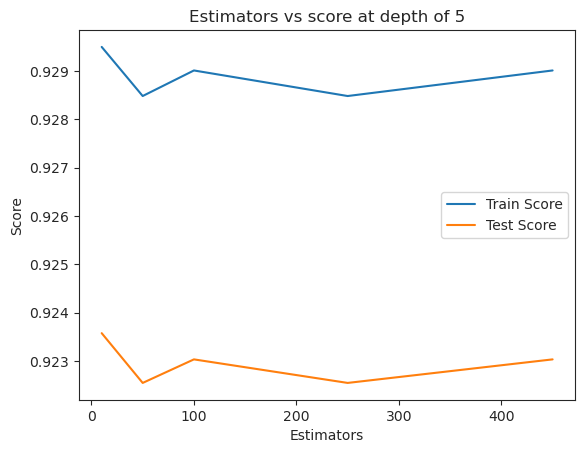

In [133]:
# depths = [3,9,11,15,20,35,50,70,130]
# train_scores = []
# test_scores = []
# for i in depths:
#     clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#             max_depth=i, max_features='auto', max_leaf_nodes=None,
#             min_impurity_decrease=0.0, min_impurity_split=None,
#             min_samples_leaf=52, min_samples_split=120,
#             min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
#     clf.fit(df_final_train,y_train)
#     train_sc = f1_score(y_train,clf.predict(df_final_train))
#     test_sc = f1_score(y_test,clf.predict(df_final_test))
#     test_scores.append(test_sc)
#     train_scores.append(train_sc)
#     print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
# plt.plot(depths,train_scores,label='Train Score')
# plt.plot(depths,test_scores,label='Test Score')
# plt.xlabel('Depth')
# plt.ylabel('Score')
# plt.title('Depth vs score at depth of 5 at estimators = 115')
# plt.show()

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

estimators = [10, 50, 100, 250, 450]
train_scores = []
test_scores = []

for i in estimators:
    clf = RandomForestClassifier(
        bootstrap=True, class_weight=None, criterion='gini',
        max_depth=5, max_features=None,  # Change 'auto' to None
        max_leaf_nodes=None,
        min_impurity_decrease=0.0,
        min_samples_leaf=52, min_samples_split=120,
        min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1, random_state=25, verbose=0, warm_start=False
    )
    
    clf.fit(df_final_train, y_train)
    
    train_sc = f1_score(y_train, clf.predict(df_final_train))
    test_sc = f1_score(y_test, clf.predict(df_final_test))
    
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    
    print('Estimators = ', i, 'Train Score', train_sc, 'test Score', test_sc)

plt.plot(estimators, train_scores, label='Train Score')
plt.plot(estimators, test_scores, label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')
plt.legend()
plt.show()


In [135]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_dist = {
    "n_estimators": sp_randint(105, 125),
    "max_depth": sp_randint(10, 15),
    "min_samples_split": sp_randint(110, 190),
    "min_samples_leaf": sp_randint(25, 65)
}

clf = RandomForestClassifier(random_state=25, n_jobs=-1)

rf_random = RandomizedSearchCV(
    clf, param_distributions=param_dist,
    n_iter=5, cv=10, scoring='f1', random_state=25,
    return_train_score=True  # Set this parameter to True
)

rf_random.fit(df_final_train, y_train)
print('mean test scores', rf_random.cv_results_['mean_test_score'])
print('mean train scores', rf_random.cv_results_['mean_train_score'])


mean test scores [0.96288188 0.96270766 0.96110485 0.96245891 0.96435737]
mean train scores [0.96410757 0.96378059 0.9617778  0.96347477 0.96564459]


In [136]:
print(rf_random.best_estimator_)

RandomForestClassifier(max_depth=14, min_samples_leaf=28, min_samples_split=111,
                       n_estimators=121, n_jobs=-1, random_state=25)


In [139]:
# clf=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#             max_depth=14, max_features='auto', max_leaf_nodes=None,
#             min_impurity_decrease=0.0, min_impurity_split=None,
#             min_samples_leaf=28, min_samples_split=111,
#             min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
#             oob_score=False, random_state=25, verbose=0, warm_start=False)
clf = RandomForestClassifier(
    bootstrap=True, class_weight=None, criterion='gini',
    max_depth=14, max_features='auto', max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=28, min_samples_split=111,
    min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
    oob_score=False, random_state=25, verbose=0, warm_start=False
)


In [144]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)



In [145]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9662786070666979
Test f1 score 0.9258267816116182


In [146]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


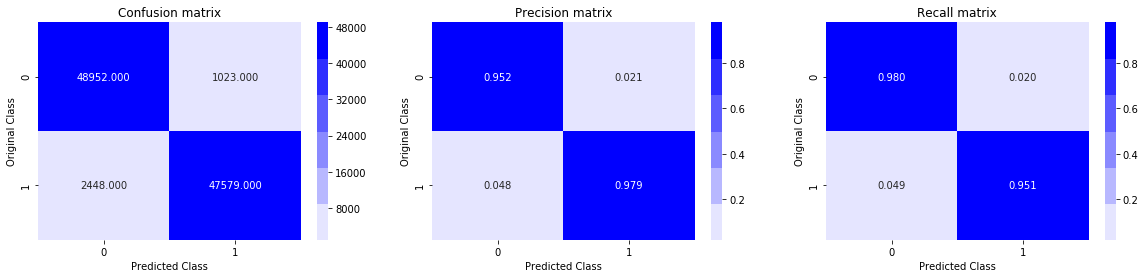

Test confusion_matrix


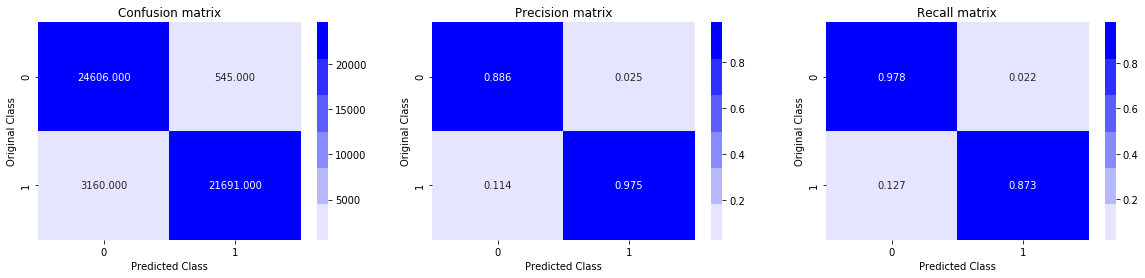

In [89]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

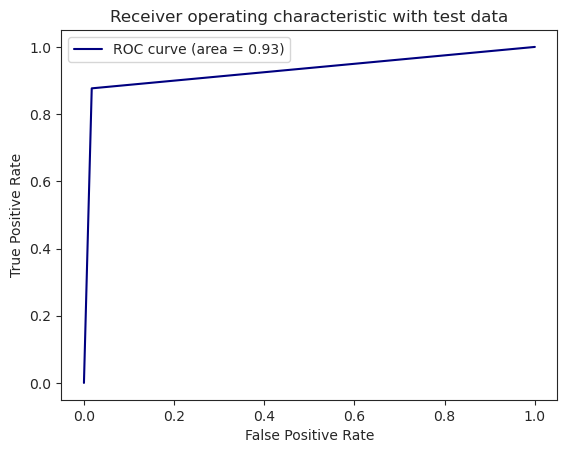

In [147]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

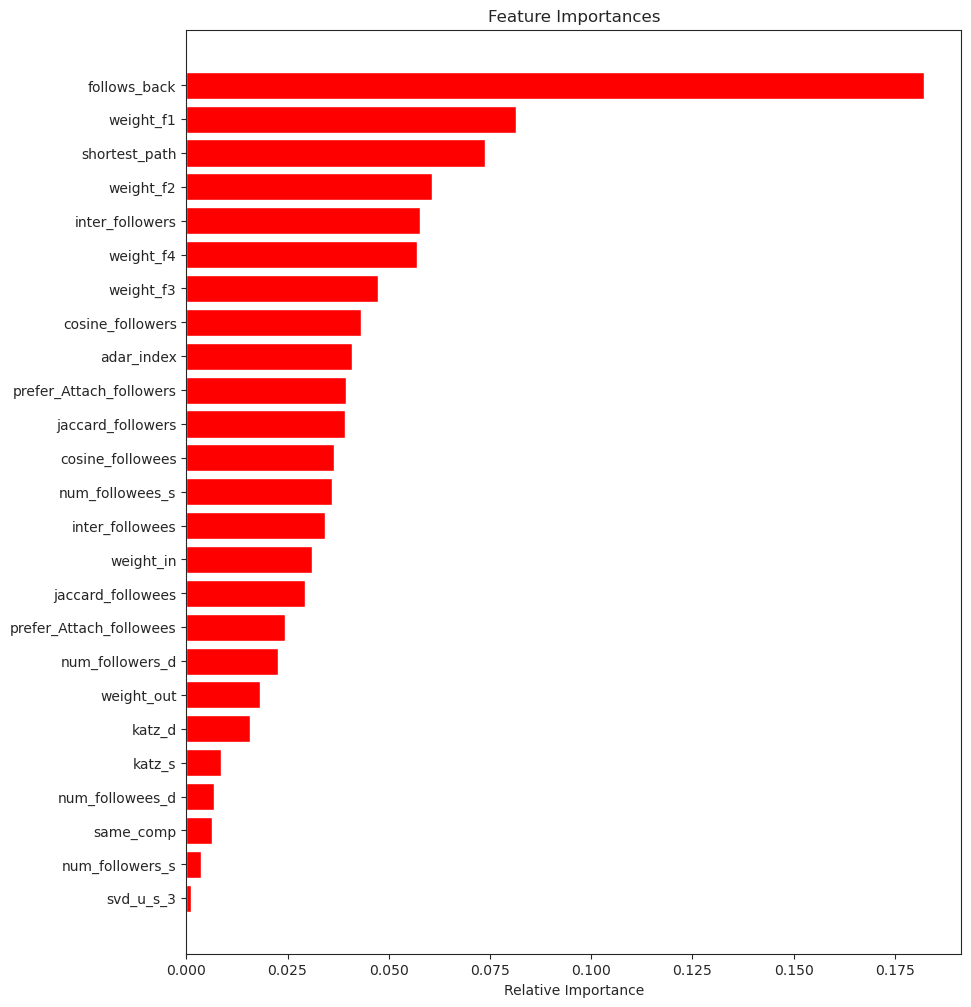

In [148]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Applying XGBOOST 

In [151]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

clf = xgb.XGBClassifier()

param_dist = {
    "n_estimators": sp_randint(105, 125),
    "max_depth": sp_randint(10, 15)
}

model = RandomizedSearchCV(
    clf, param_distributions=param_dist,
    n_iter=5, cv=3, scoring='f1', random_state=25,
    return_train_score=True  # Set this parameter to True
)

model.fit(df_final_train, y_train)
print('mean test scores', model.cv_results_['mean_test_score'])
print('mean train scores', model.cv_results_['mean_train_score'])


mean test scores [0.98110151 0.98113121 0.98200056 0.98146375 0.98155587]
mean train scores [1. 1. 1. 1. 1.]


In [152]:
print(model.best_estimator_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=109, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [162]:
# clf=xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#        colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
#        max_depth=10, min_child_weight=1, missing=None, n_estimators=109,
#        n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
#        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
#        silent=True, subsample=1)

import xgboost as xgb

# Initialize XGBoost classifier
clf = xgb.XGBClassifier(
    base_score=0.5, booster='gbtree', colsample_bylevel=1,
    colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
    max_depth=10, min_child_weight=1, missing=np.nan,  # Set missing value here
    n_estimators=109, n_jobs=1, nthread=None,
    objective='binary:logistic', random_state=0,
    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
    silent=True, subsample=1
)


In [163]:
# Fit the model to the training data
clf.fit(df_final_train, y_train)

# Predictions on the training set
y_train_pred = clf.predict(df_final_train)

# Predictions on the test set
y_test_pred = clf.predict(df_final_test)

In [164]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9921963219874174
Test f1 score 0.9267321700830087


Train confusion_matrix


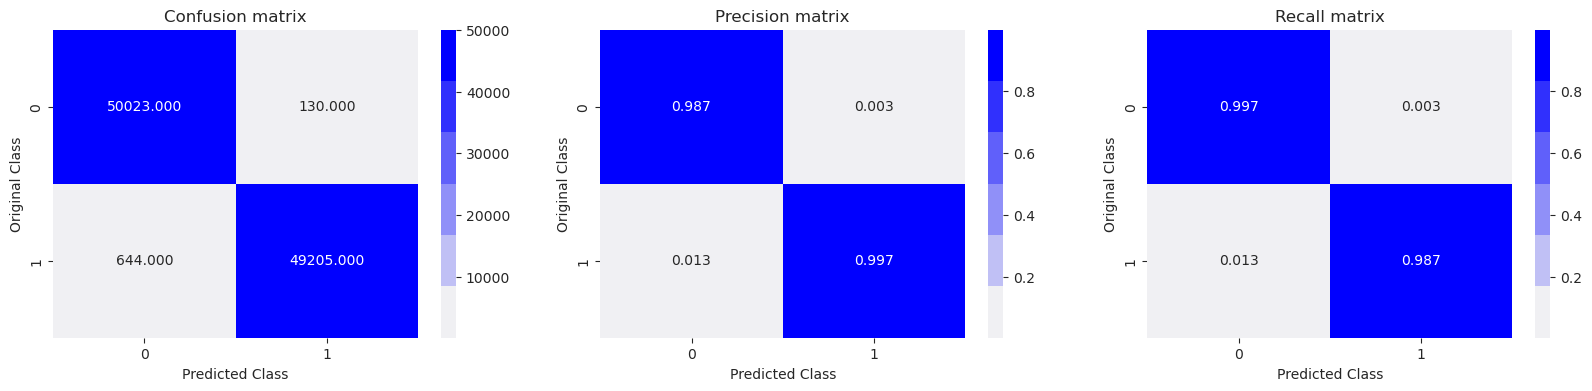

Test confusion_matrix


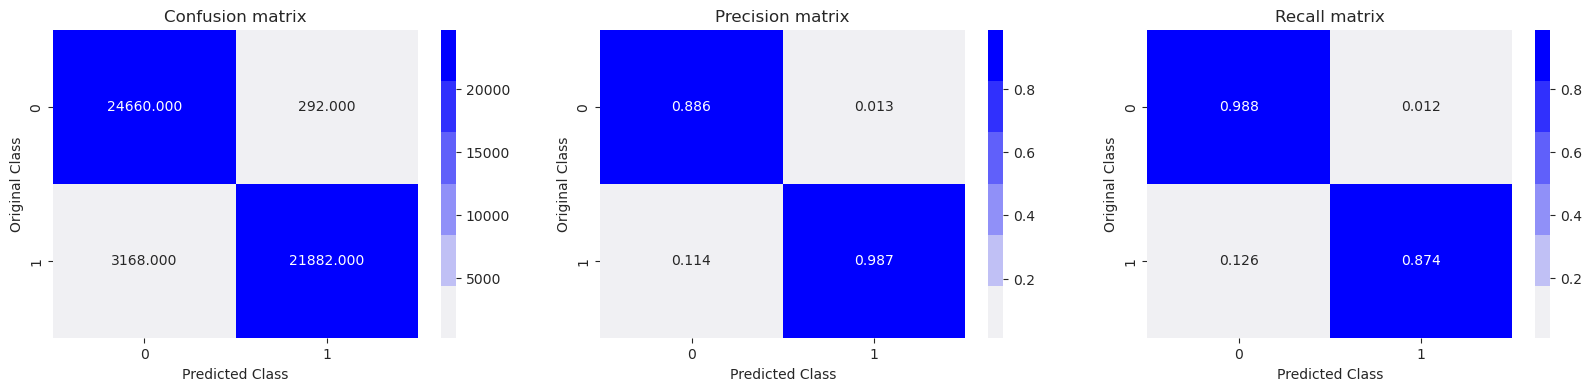

In [165]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

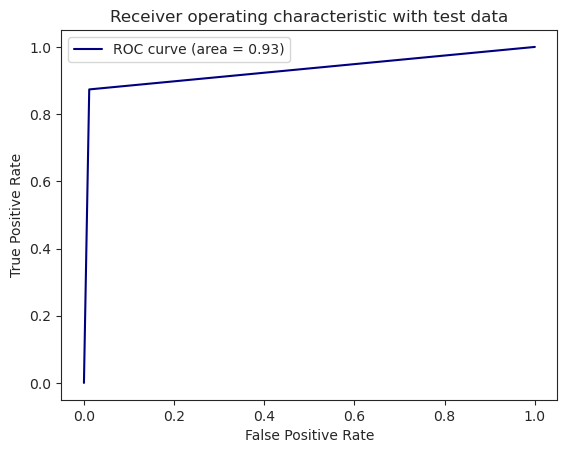

In [166]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

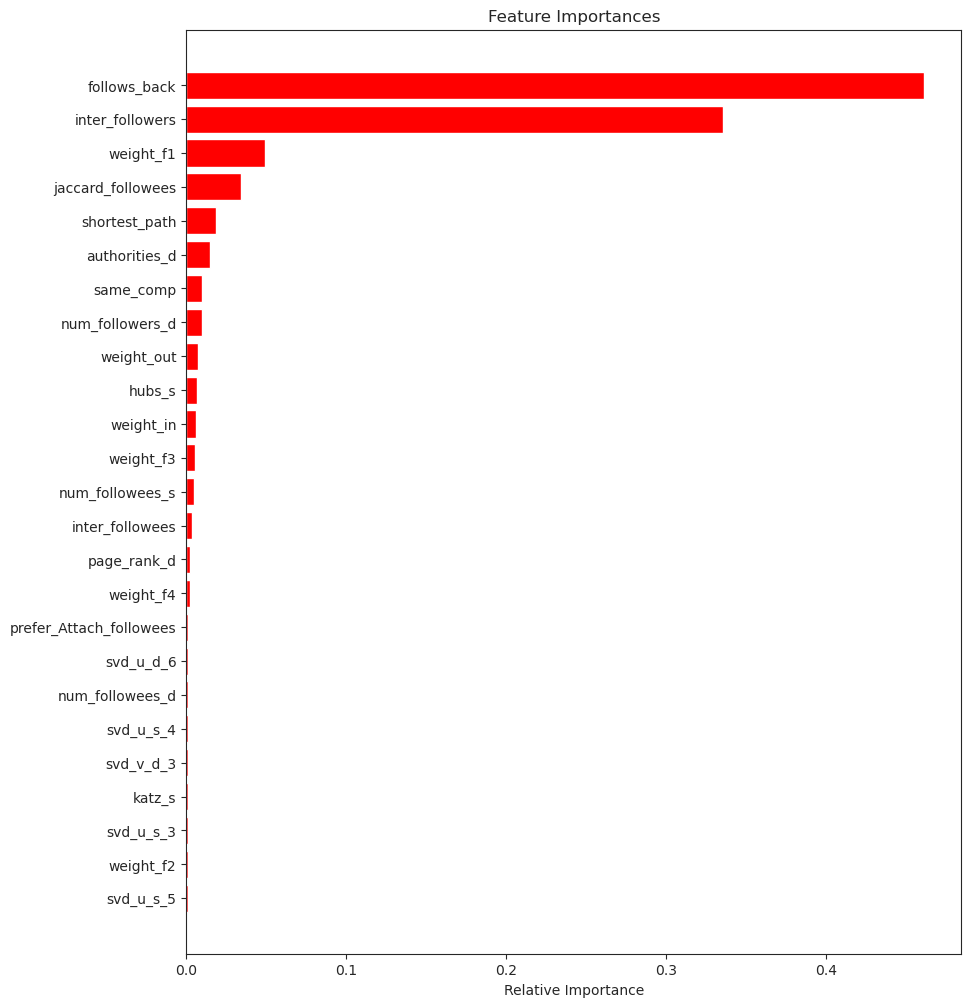

In [167]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Procedure and Observation

In [170]:
from prettytable import PrettyTable 
x = PrettyTable()
x.field_names = ["Model", "n_estimators", "max_depth", "Train f1-Score","Test f1-Score"]
x.add_row(['Random Forest','121','14','0.964','0.921'])
x.add_row(['XGBOOST','109','10','0.992','0.926'])
print(x)


+---------------+--------------+-----------+----------------+---------------+
|     Model     | n_estimators | max_depth | Train f1-Score | Test f1-Score |
+---------------+--------------+-----------+----------------+---------------+
| Random Forest |     121      |     14    |     0.964      |     0.921     |
|    XGBOOST    |     109      |     10    |     0.992      |     0.926     |
+---------------+--------------+-----------+----------------+---------------+


1) Initially we have only a couple feature in our data-set. First we performed exploratory data analysis on our given data set such as number of followers and followees of each person.

2) Then after we generated some datapoints which were not present in our given data-set, since we had only class label 1 data.

3) Then we did some feature engineering on dataset like finding shortest path, kartz centrality, jaccard distances, page rank, preferential attachements etc.

4) After performing eploratory data analysis and feature engineering we splitted whole dataset into train and test and performed random forest and xgboost taking f1-score as our metric.

5) At the end we plotted confusion matrix and pretty-table for both algorithm and found best hyperparameters.

In [169]:
!pip install prettytable


  Obtaining dependency information for prettytable from https://files.pythonhosted.org/packages/3d/c4/a32f4bf44faf95accbbd5d7864ddef9e289749a8efbc3adaad4a4671779a/prettytable-3.10.0-py3-none-any.whl.metadata
